# House Prices - Advanced Regression Techniques

### Task - Predict sales prices and practice feature engineering with Dtrees

In [1]:
# Importing the needed libraries

# Ignoring warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# For numerical operations
import numpy as np   

# For data manipulation and analysis
import pandas as pd

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from ggplot import *

# For preprocessing tasks like one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# For handling missing data
from sklearn.impute import SimpleImputer

# For implementing the LightGBM model
from lightgbm import LGBMRegressor

# For implementing the K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsRegressor

# For implementing a neural network regressor
from sklearn.neural_network import MLPRegressor

# For creating machine learning pipelines
from sklearn.pipeline import make_pipeline

# For implementing decision trees
from sklearn.tree import DecisionTreeRegressor

# For ensemble learning models
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor

# For implementing the XGBoost model
from xgboost import XGBRegressor

# For implementing linear regression
from sklearn.linear_model import LinearRegression

# For model evaluation metrics
from sklearn import metrics

# For pipeline
from sklearn.pipeline import Pipeline

# For hyperparameter tuning and splitting data
from sklearn.model_selection import GridSearchCV, train_test_split

# For implementing Ridge regression
from sklearn.linear_model import Ridge

# For applying transformations to specific columns
from sklearn.compose import ColumnTransformer

# For generating regression datasets
from sklearn.datasets import make_regression

# For handling imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# For creating polynomial features
from sklearn.preprocessing import PolynomialFeatures

# For statistical modeling
from statsmodels.api import OLS
from statsmodels.tools import add_constant

# For hyperparameter optimization
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

# For evaluating model performance using cross-validation
from sklearn.model_selection import cross_val_score

# For feature selection
from sklearn.feature_selection import RFE

# For XGBoost callbacks
from xgboost.callback import TrainingCallback

# For regular expressions
import re

# SCR model
from sklearn.svm import SVR

# For statistical distributions and tests
from scipy.stats import randint, uniform, loguniform
import statsmodels.api as sm

# For displaying HTML content in Jupyter notebooks
from IPython.core.display import HTML, display

# For standardizing features
from sklearn.preprocessing import StandardScaler

# For label encoding categorical features
from sklearn.preprocessing import LabelEncoder

# For mathematical operations
from math import sqrt

# For displaying progress bars
from tqdm import tqdm

# LightGBM library
import lightgbm as lgb

# For statistical distributions and tests (duplicate, can be removed)
from scipy.stats import uniform, randint

# For random search hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# For regression evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# For interacting with the operating system
import os

# Printing the paths of input files (specific to Kaggle environment)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Comment on Kaggle-specific storage options
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Data Loading & Overview

In [2]:
# Function to create scrollable table within a small window
def create_scrollable_table(data, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto; width:45%; float:left; margin-right:10px;">'
    html += data.to_html()
    html += '</div>'
    return html

In [3]:
# Function to create scrollable table within a small window
def create_scrollable_table2(data, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:400px; overflow:auto; width:100%; white-space: nowrap;">'
    html += data.to_html(index=False)
    html += '</div>'
    return html

* Used AI to generate scrollable codes to meet the demand of the high number of columns

In [4]:
# Loading dataset
data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
data_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

# Select top and bottom 10 rows for data
top_bottom_data = pd.concat([data.head(10), data.tail(10)])

# Select top and bottom 10 rows for data_test
top_bottom_data_test = pd.concat([data_test.head(10), data_test.tail(10)])

# Display scrollable tables for top and bottom 10 rows of data and data_test
html_data = create_scrollable_table2(top_bottom_data, 'data_table', 'Top and bottom 10 rows of Training Data')
html_data_test = create_scrollable_table2(top_bottom_data_test, 'data_test_table', 'Top and bottom 10 rows of Test Data')

# Combine the HTML for display
combined_html = f'''
<div style="display: flex; flex-wrap: wrap;">
    <div style="width: 50%; margin-right: 10px;">
        {html_data}
    </div>
    <div style="width: 50%;">
        {html_data_test}
    </div>
</div>
'''

# Display the combined HTML
display(HTML(combined_html))

* There are a lot of missing values in some of the columns

In [5]:
# Null values in the datasets
null_values_data = data.isnull().sum()
null_values_data_test = data_test.isnull().sum()

html_null_values_data = create_scrollable_table(null_values_data.to_frame(), 'null_values_data', 'Null values in data')
html_null_values_data_test = create_scrollable_table(null_values_data_test.to_frame(), 'null_values_data_test', 'Null values in data_test')

# Percentage of missing values for each feature
missing_percentage_data = (data.isnull().sum() / len(data)) * 100
missing_percentage_data_test = (data_test.isnull().sum() / len(data_test)) * 100

html_missing_percentage_data = create_scrollable_table(missing_percentage_data.to_frame(), 'missing_percentage_data', 'Percentage of missing values in data')
html_missing_percentage_data_test = create_scrollable_table(missing_percentage_data_test.to_frame(), 'missing_percentage_data_test', 'Percentage of missing values in data_test')

# Combine the HTML for display
combined_html = f'''
<div style="display: flex; flex-wrap: wrap;">
    <div style="width: 50%;">
        {html_null_values_data}
        {html_missing_percentage_data}
    </div>
    <div style="width: 50%;">
        {html_null_values_data_test}
        {html_missing_percentage_data_test}
    </div>
</div>
'''

# Display the combined HTML
display(HTML(combined_html))

* Some of the columns have high percentage of missing values

In [6]:
# Calculate the percentage of missing values for each feature
missing_percentage_data = (data.isnull().sum() / len(data)) * 100
missing_percentage_data_test = (data_test.isnull().sum() / len(data_test)) * 100

# Filter columns with more than 15% missing values
columns_with_missing_data = missing_percentage_data[missing_percentage_data > 15]
columns_with_missing_data_test = missing_percentage_data_test[missing_percentage_data_test > 15]

# Convert to DataFrame for display
columns_with_missing_data_df = columns_with_missing_data.to_frame(name='Missing Percentage')
columns_with_missing_data_test_df = columns_with_missing_data_test.to_frame(name='Missing Percentage')

# Create HTML representations
html_columns_with_missing_data = create_scrollable_table(columns_with_missing_data_df, 'columns_with_missing_data', 'Columns with >15% missing values in data')
html_columns_with_missing_data_test = create_scrollable_table(columns_with_missing_data_test_df, 'columns_with_missing_data_test', 'Columns with >15% missing values in data_test')

# Combine the HTML for display
combined_html = f'''
<div style="display: flex; flex-wrap: wrap;">
    <div style="width: 50%;">
        {html_columns_with_missing_data}
    </div>
    <div style="width: 50%;">
        {html_columns_with_missing_data_test}
    </div>
</div>
'''

# Display the combined HTML
display(HTML(combined_html))

* Apart of LotFrontage all other columns have to be inspected for correct treatment

In [7]:
# Calculate the percentage of missing values for each feature
missing_percentage_data = (data.isnull().sum() / len(data)) * 100
missing_percentage_data_test = (data_test.isnull().sum() / len(data_test)) * 100

# Filter columns with more than 15% missing values
columns_with_missing_data = data[missing_percentage_data[missing_percentage_data > 15].index]
columns_with_missing_data_test = data_test[missing_percentage_data_test[missing_percentage_data_test > 15].index]

# Get top and bottom 20 rows
top_bottom_data = pd.concat([columns_with_missing_data.head(20), columns_with_missing_data.tail(20)])
top_bottom_data_test = pd.concat([columns_with_missing_data_test.head(20), columns_with_missing_data_test.tail(20)])

# Create HTML representations
html_top_bottom_data = create_scrollable_table(top_bottom_data, 'top_bottom_data', 'Top and bottom 20 rows of columns with >15% missing values in data')
html_top_bottom_data_test = create_scrollable_table(top_bottom_data_test, 'top_bottom_data_test', 'Top and bottom 20 rows of columns with >15% missing values in data_test')

# Combine the HTML for display
combined_html = f'''
<div style="display: flex; flex-wrap: wrap;">
    <div style="width: 50%;">
        {html_top_bottom_data}
    </div>
    <div style="width: 50%;">
        {html_top_bottom_data_test}
    </div>
</div>
'''

# Display the combined HTML
display(HTML(combined_html))

* The dataset contains many missing values, especially in the columns Alley, FireplaceQu, PoolQC, Fence, and MiscFeature, while LotFrontage and MasVnrType have some missing values, indicating incomplete data for these features

In [8]:
# Columns to compare
columns_to_compare = ['PoolQC', 'PoolArea']

# Get top and bottom 20 rows for data
top_bottom_data = pd.concat([data[columns_to_compare].head(20), data[columns_to_compare].tail(20)])

# Get top and bottom 20 rows for data_test
top_bottom_data_test = pd.concat([data_test[columns_to_compare].head(20), data_test[columns_to_compare].tail(20)])

# Create HTML representations
html_top_bottom_data = create_scrollable_table(top_bottom_data, 'top_bottom_data', 'Top and bottom 20 rows of PoolQC and PoolArea in data')
html_top_bottom_data_test = create_scrollable_table(top_bottom_data_test, 'top_bottom_data_test', 'Top and bottom 20 rows of PoolQC and PoolArea in data_test')

# Combine the HTML for display
combined_html = f'''
<div style="display: flex; flex-wrap: wrap;">
    <div style="width: 50%;">
        {html_top_bottom_data}
    </div>
    <div style="width: 50%;">
        {html_top_bottom_data_test}
    </div>
</div>
'''

# Display the combined HTML
display(HTML(combined_html))

* Columns from PoolQC with missing values also have zero values in colums PoolArea

In [9]:
# Filter rows where PoolQC is not NaN and PoolArea is not 0 for data
filtered_data = data[data['PoolQC'].notna() & (data['PoolArea'] != 0)][['PoolQC', 'PoolArea']]

# Filter rows where PoolQC is not NaN and PoolArea is not 0 for data_test
filtered_data_test = data_test[data_test['PoolQC'].notna() & (data_test['PoolArea'] != 0)][['PoolQC', 'PoolArea']]

# Display scrollable tables for filtered data and filtered data_test
html_data = create_scrollable_table2(filtered_data, 'data_table', 'Rows without NaN in PoolQC and non-zero PoolArea in Training Data')
html_data_test = create_scrollable_table2(filtered_data_test, 'data_test_table', 'Rows without NaN in PoolQC and non-zero PoolArea in Test Data')

# Combine the HTML for display
combined_html = f'''
<div style="display: flex; flex-wrap: wrap;">
    <div style="width: 50%; margin-right: 10px;">
        {html_data}
    </div>
    <div style="width: 50%;">
        {html_data_test}
    </div>
</div>
'''

# Display the combined HTML
display(HTML(combined_html))

* Onle 7 columns from PoolQC and PoolArea have actual values

In [10]:
# Columns to compare
columns_to_compare = ['Alley', 'Street']

# Get top and bottom 20 rows for data
top_bottom_data = pd.concat([data[columns_to_compare].head(20), data[columns_to_compare].tail(20)])

# Get top and bottom 20 rows for data_test
top_bottom_data_test = pd.concat([data_test[columns_to_compare].head(20), data_test[columns_to_compare].tail(20)])

# Create HTML representations
html_top_bottom_data = create_scrollable_table(top_bottom_data, 'top_bottom_data', 'Top and bottom 20 rows of Alley and Street in data')
html_top_bottom_data_test = create_scrollable_table(top_bottom_data_test, 'top_bottom_data_test', 'Top and bottom 20 rows of Alley and Street in data_test')

# Combine the HTML for display
combined_html = f'''
<div style="display: flex; flex-wrap: wrap;">
    <div style="width: 50%;">
        {html_top_bottom_data}
    </div>
    <div style="width: 50%;">
        {html_top_bottom_data_test}
    </div>
</div>
'''

# Display the combined HTML
display(HTML(combined_html))

In [11]:
count_pave = (data['Street'] == 'Pave').sum()
print("Number of 'Pave' values:", count_pave)

count_grvl = (data['Street'] == 'Grvl').sum()
print("Number of 'Grvl' values:", count_grvl)

Number of 'Pave' values: 1454
Number of 'Grvl' values: 6


* Alley and Street are the same so will take them in consideration for feature engineering

In [12]:
# Filter rows where FireplaceQu is NaN and Fireplaces is 0 for data
filtered_data_nan_zero = data[data['FireplaceQu'].isna() & (data['Fireplaces'] == 0)][['FireplaceQu', 'Fireplaces']]

# Filter rows where FireplaceQu is NaN and Fireplaces is 0 for data_test
filtered_data_test_nan_zero = data_test[data_test['FireplaceQu'].isna() & (data_test['Fireplaces'] == 0)][['FireplaceQu', 'Fireplaces']]

# Display scrollable tables for filtered data and filtered data_test
html_data_nan_zero = create_scrollable_table(filtered_data_nan_zero, 'data_nan_zero_table', 'Rows with NaN in FireplaceQu and 0 in Fireplaces in Training Data')
html_data_test_nan_zero = create_scrollable_table(filtered_data_test_nan_zero, 'data_test_nan_zero_table', 'Rows with NaN in FireplaceQu and 0 in Fireplaces in Test Data')

# Combine the HTML for display
combined_html = f'''
<div style="display: flex; flex-wrap: wrap;">
    <div style="width: 50%; margin-right: 10px;">
        {html_data_nan_zero}
    </div>
    <div style="width: 50%;">
        {html_data_test_nan_zero}
    </div>
</div>
'''

# Display the combined HTML
display(HTML(combined_html))

* Similar issue in those two columns

In [13]:
# Filter rows where MiscFeature is NaN and MiscVal is 0 for data
filtered_data_nan_zero = data[data['MiscFeature'].isna() & (data['MiscVal'] == 0)][['MiscFeature', 'MiscVal']]

# Filter rows where MiscFeature is NaN and MiscVal is 0 for data_test
filtered_data_test_nan_zero = data_test[data_test['MiscFeature'].isna() & (data_test['MiscVal'] == 0)][['MiscFeature', 'MiscVal']]

# Display scrollable tables for filtered data and filtered data_test
html_data_nan_zero = create_scrollable_table(filtered_data_nan_zero, 'data_nan_zero_table', 'Rows with NaN in MiscFeature and 0 in MiscVal in Training Data')
html_data_test_nan_zero = create_scrollable_table(filtered_data_test_nan_zero, 'data_test_nan_zero_table', 'Rows with NaN in MiscFeature and 0 in MiscVal in Test Data')

# Combine the HTML for display
combined_html = f'''
<div style="display: flex; flex-wrap: wrap;">
    <div style="width: 50%; margin-right: 10px;">
        {html_data_nan_zero}
    </div>
    <div style="width: 50%;">
        {html_data_test_nan_zero}
    </div>
</div>
'''

# Display the combined HTML
display(HTML(combined_html))

* New feature will be considered for these columns as well

In [14]:
# Number of duplicate rows in the datasets
duplicate_rows_data = data.duplicated().sum()
duplicate_rows_data_test = data_test.duplicated().sum()

# Create DataFrames for duplicate rows
duplicate_rows_data_df = pd.DataFrame({'Duplicate Rows': [duplicate_rows_data]})
duplicate_rows_data_test_df = pd.DataFrame({'Duplicate Rows': [duplicate_rows_data_test]})

html_duplicate_rows_data = create_scrollable_table(duplicate_rows_data_df, 'duplicate_rows_data', 'Duplicate rows in data')
html_duplicate_rows_data_test = create_scrollable_table(duplicate_rows_data_test_df, 'duplicate_rows_data_test', 'Duplicate rows in data_test')

# Combine the HTML for display
combined_html = f'''
<div style="display: flex; flex-wrap: wrap;">
    <div style="width: 50%;">
        {html_duplicate_rows_data}
    </div>
    <div style="width: 50%;">
        {html_duplicate_rows_data_test}
    </div>
</div>
'''

# Display the combined HTML
display(HTML(combined_html))

* There are no duplicates

In [15]:
# Summary statistics for numerical features
numerical_features = data.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

* House IDs: The dataset contains 1460 unique house IDs, indicating 1460 individual observations.
* Lot Frontage: Lot frontage values vary significantly, with a mean of 70.05 feet and a standard deviation of 24.28 feet. The range is from 21 to 313 feet, indicating diverse lot sizes.
* Lot Area: Lot area has a wide range, with a mean of 10,516.83 square feet and a large standard deviation of 9,981.26 square feet. The maximum lot area is 215,245 square feet, significantly larger than the average.
* Overall Quality and Condition: Overall quality (mean: 6.1) and overall condition (mean: 5.6) of houses suggest that most houses are above average in quality and in good condition.
+ Year Built and Year Remodeled: Houses in the dataset were built between 1872 and 2010, with a mean construction year of 1971.27. Many houses have been remodeled, with the average remodeling year being 1984.87.
* Basement Area: Total basement area varies widely, with a mean of 1,057.43 square feet and a standard deviation of 438.71 square feet. Some houses do not have basements (min: 0), while the largest basement is 6,110 square feet.
* Living Area: Above-ground living area (GrLivArea) ranges from 334 to 5,642 square feet, with a mean of 1,515.46 square feet, indicating a wide variety of house sizes.
* Garage: The average garage can accommodate approximately 1.77 cars, with garage areas ranging from 0 to 1,418 square feet. The mean garage area is 472.98 square feet.
* Bathrooms: Most houses have a full bathroom, with an average of 1.57 full bathrooms and 0.38 half bathrooms. The maximum number of full bathrooms in a house is 3.
* Sale Price: Sale prices range widely from 34,900 to 755,000, with an average of 180,921.20 and a standard deviation of 79,442.50, indicating significant variation in house values.

In [16]:
# Summary statistics for categorical features
categorical_features = data.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical ))

* Zoning: The majority of houses are in the 'RL' (Residential Low Density) zoning category, which includes 1151 out of 1460 observations.
* Street Type: Nearly all houses are located on paved streets (1454 out of 1460), suggesting well-developed infrastructure.
* Lot Shape: Most lots are regular in shape ('Reg'), with 925 out of 1460 houses having this characteristic.
* Utilities: Almost all houses have access to all public utilities ('AllPub'), with only one house lacking this.
* Neighborhood: The most common neighborhood is 'NAmes', with 225 houses, indicating it might be a prominent or large neighborhood in the dataset.
* Exterior Quality: The exterior quality of most houses is rated 'TA' (Typical/Average), with 906 houses falling into this category.
* Foundation Type: The most common foundation type is 'PConc' (Poured Concrete), used in 647 houses.
* Heating: The primary heating type is 'GasA' (Gas forced warm air furnace), found in 1428 houses.
* Central Air: A vast majority of houses (1365 out of 1460) have central air conditioning, indicating a common preference for this feature.
* Sale Condition: The most common sale condition is 'Normal', which applies to 1198 houses, suggesting that most transactions are standard sales rather than foreclosures or other non-typical sales.

In [17]:
df = data.copy()
df_test = data_test.copy()

# Exploratory Data Analysis (EDA)

## Univariate Analysis:

In [18]:
# SalePrice: Histogram
fig1 = px.histogram(df, x='SalePrice', title='Distribution of Sale Prices')
fig1.update_layout(bargap=0.1)
fig1.show()

* Close to a normal distribution a bit right skewed 
* The highest count is the price range of 140 - 150k 

In [19]:
# GrLivArea: Histogram
fig2 = px.histogram(df, x='GrLivArea', title='Distribution of Above Grade Living Area')
fig2.update_layout(bargap=0.1)
fig2.show()

* Close to a normal distribution a bit right skewed with grades from 800 to 2000 the most prefered

In [20]:
# OverallQual: Bar chart
overall_qual_counts = df['OverallQual'].value_counts().sort_index()
fig3 = px.bar(x=overall_qual_counts.index, y=overall_qual_counts.values, 
              labels={'x': 'Overall Quality', 'y': 'Count'},
              title='Distribution of Overall Quality')
fig3.show()

* Close to a normal distribution a bit right skewed & quality 5 with the highest count

In [21]:
# YearBuilt: Histogram
fig4 = px.histogram(df, x='YearBuilt', title='Distribution of Year Built')
fig4.update_layout(bargap=0.1)
fig4.show()

* Left skewed distribution as most of the houses are relatively new 

In [22]:
# YearRemodAdd: Histogram
fig5 = px.histogram(df, x='YearRemodAdd', title='Distribution of Year Remodeled')
fig5.update_layout(bargap=0.1)
fig5.show()

* Very olg and new houses we remodeled the most

In [23]:
# TotalBsmtSF: Histogram
fig6 = px.histogram(df, x='TotalBsmtSF', title='Distribution of Total Basement Area')
fig6.update_layout(bargap=0.1)
fig6.show()

* Close to a normal distribution a bit right skewed with the most common side of 850 to 900

In [24]:
# GarageCars: Bar chart
garage_cars_counts = df['GarageCars'].value_counts().sort_index()
fig7 = px.bar(x=garage_cars_counts.index, y=garage_cars_counts.values, 
              labels={'x': 'Number of Cars', 'y': 'Count'},
              title='Distribution of Garage Capacity')
fig7.show()

* Most garages have capacity of two cars

In [25]:
# GarageArea: Histogram
fig8 = px.histogram(df, x='GarageArea', title='Distribution of Garage Area')
fig8.update_layout(bargap=0.1)
fig8.show()

* The most common garage area size is between 400 and 600

In [26]:
# 1stFlrSF: Histogram
fig9 = px.histogram(df, x='1stFlrSF', title='Distribution of First Floor Area')
fig9.update_layout(bargap=0.1)
fig9.show()

* Right skewed distribution with the most common area side between 800 and 1100

In [27]:
# 2ndFlrSF: Histogram
fig10 = px.histogram(df, x='2ndFlrSF', title='Distribution of Second Floor Area')
fig10.update_layout(bargap=0.1)
fig10.show()

* Most houses don't have a second floor area

In [28]:
# LotArea: Histogram
fig11 = px.histogram(df, x='LotArea', title='Distribution of Lot Area')
fig11.update_layout(bargap=0.1)
fig11.show()

* Looks close to a normal distribution

In [29]:
# Neighborhood: Bar chart
neighborhood_counts = df['Neighborhood'].value_counts()
fig12 = px.bar(x=neighborhood_counts.index, y=neighborhood_counts.values, 
               labels={'x': 'Neighborhood', 'y': 'Count'},
               title='Distribution of Neighborhoods')
fig12.show()

* The most prefered Neighborhood is NAmes

In [30]:
# OverallCond: Bar chart
overall_cond_counts = df['OverallCond'].value_counts().sort_index()
fig13 = px.bar(x=overall_cond_counts.index, y=overall_cond_counts.values, 
               labels={'x': 'Overall Condition', 'y': 'Count'},
               title='Distribution of Overall Condition')
fig13.show()

* Houses with overall condition five are the most prefered

## Bivariate Analysis:

In [31]:
# SalePrice vs. GrLivArea: Scatter plot
fig1 = px.scatter(df, x='GrLivArea', y='SalePrice', title='Sale Price vs. Above Grade Living Area')
fig1.update_traces(marker=dict(size=3, opacity=0.6),
                   selector=dict(mode='markers'))
fig1.show()

* Positive linearity for the Sale Price vs. Above Grade Living Area

In [32]:
# SalePrice vs. OverallQual: Box plot
fig2 = px.box(df, x='OverallQual', y='SalePrice', title='Sale Price vs. Overall Quality')
fig2.update_traces(marker=dict(size=3, opacity=0.6),
                   selector=dict(type='box'))
fig2.show()


* Prices also increase with the betetr overall quality

In [33]:
# SalePrice vs. Neighborhood: Box plot
fig10 = px.box(df, x='Neighborhood', y='SalePrice', title='Sale Price vs. Neighborhood')
fig10.update_traces(marker=dict(size=3, opacity=0.6),
                    selector=dict(type='box'))
fig10.update_layout(xaxis={'categoryorder':'mean ascending'})
fig10.show()

* The most expencive Neighborhoods are NoRidge, NridgHt and StoneBr

In [34]:
# SalePrice vs. YearBuilt: Box plot
fig3 = px.box(df, x='YearBuilt', y='SalePrice', title='Sale Price vs. Year Built')
fig3.update_traces(marker=dict(size=3, opacity=0.6),
                   selector=dict(type='box'))
fig3.show()

* Highest prices are among the oldest and newest houses

In [35]:
# SalePrice vs. TotalBsmtSF: Scatter plot
fig4 = px.scatter(df, x='TotalBsmtSF', y='SalePrice', title='Sale Price vs. Total Basement Area')
fig4.update_traces(marker=dict(size=3, opacity=0.6),
                   selector=dict(mode='markers'))
fig4.show()

* Positive linearity for the Sale Price vs. Total Basement Area

In [36]:
# SalePrice vs. GarageCars: Box plot
fig5 = px.box(df, x='GarageCars', y='SalePrice', title='Sale Price vs. Garage Capacity')
fig5.update_traces(marker=dict(size=3, opacity=0.6),
                   selector=dict(type='box'))
fig5.show()

* The most expencive garages have capacity of 3 cars

In [37]:
# SalePrice vs. GarageArea: Scatter plot
fig6 = px.scatter(df, x='GarageArea', y='SalePrice', title='Sale Price vs. Garage Area')
fig6.update_traces(marker=dict(size=3, opacity=0.6),
                   selector=dict(mode='markers'))
fig6.show()

* Positive linearity for the Sale Price vs. Garage Area

In [38]:
# SalePrice vs. 1stFlrSF: Scatter plot
fig7 = px.scatter(df, x='1stFlrSF', y='SalePrice', title='Sale Price vs. First Floor Area')
fig7.update_traces(marker=dict(size=3, opacity=0.6),
                   selector=dict(mode='markers'))
fig7.show()

* Positive linearity for the Sale Price vs. First Floor Area

In [39]:
# SalePrice vs. 2ndFlrSF: Scatter plot
fig8 = px.scatter(df, x='2ndFlrSF', y='SalePrice', title='Sale Price vs. Second Floor Area')
fig8.update_traces(marker=dict(size=3, opacity=0.6),
                   selector=dict(mode='markers'))
fig8.show()

* Positive linearity for the Sale Price vs. Second Floor Area

In [40]:
# SalePrice vs. LotArea: Scatter plot
fig9 = px.scatter(df, x='LotArea', y='SalePrice', title='Sale Price vs. Lot Area')
fig9.update_traces(marker=dict(size=3, opacity=0.6),
                   selector=dict(mode='markers'))
fig9.show()

* Some sort of positive corelation but loots like there are a lot of outliers

In [41]:
# SalePrice vs. Overall Condition: Box plot
fig_saleprice_overallcond = px.box(df, x='OverallCond', y='SalePrice', 
                                   title='Sale Price Distribution by Overall Condition', 
                                   labels={'OverallCond': 'Overall Condition', 'SalePrice': 'Sale Price'})
fig_saleprice_overallcond.update_layout(xaxis={'categoryorder':'mean descending'})
fig_saleprice_overallcond.show()

* Houses with Overall Condition or 9 and 5 have have the highest prices

### Multivariate Analysis:

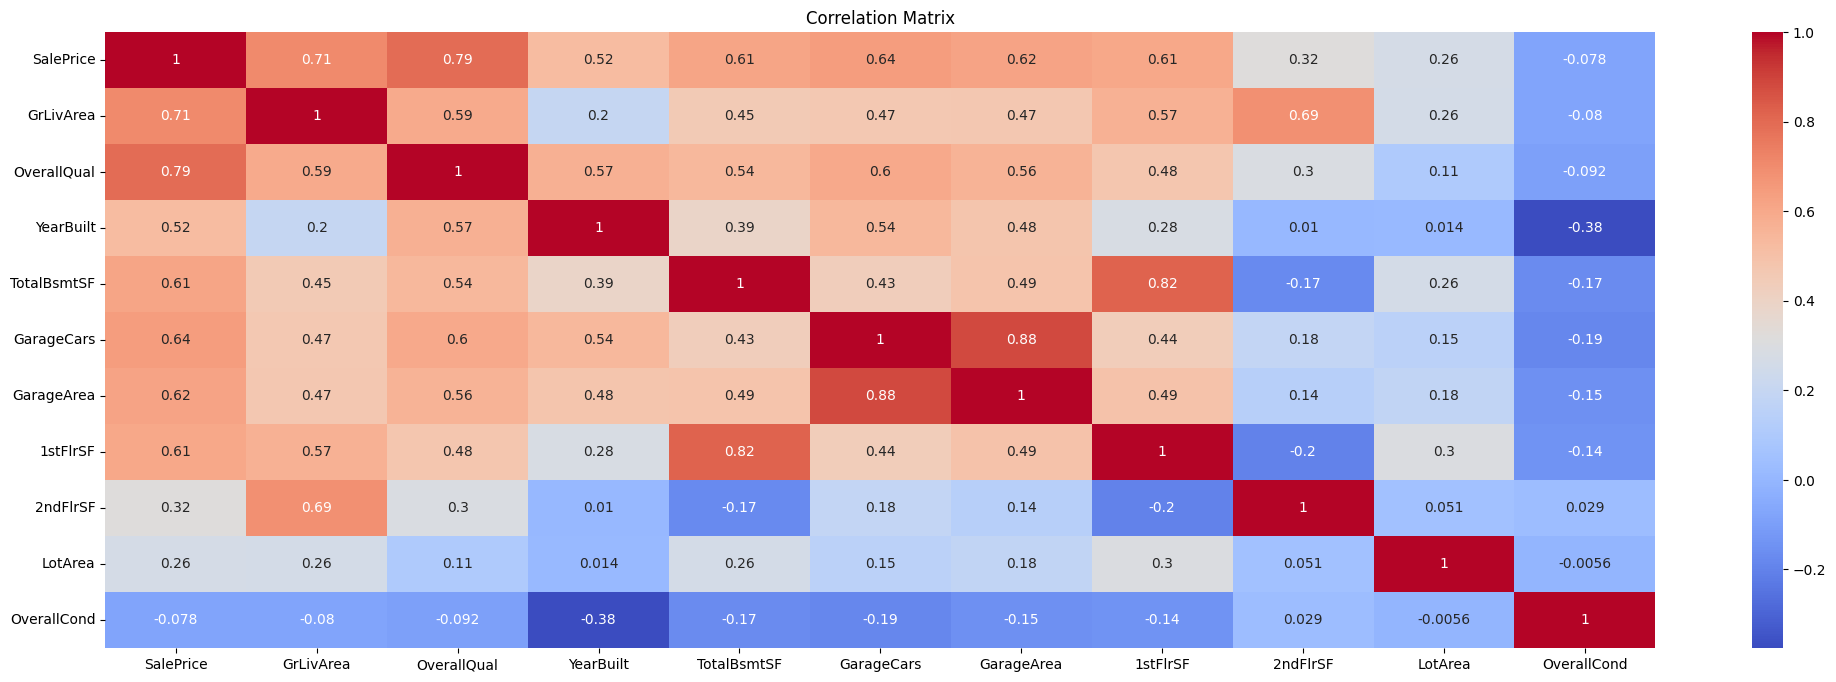

In [42]:
# To understand the relationship between numerical variables
corr_matrix = df[['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 
                  'GarageCars', 'GarageArea', '1stFlrSF', '2ndFlrSF', 'LotArea', 'OverallCond']].corr()

plt.figure(figsize=(25, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

* Apart of 2ndFlrSF and LotArea all othe variables are have a high positive corelation to the target variable

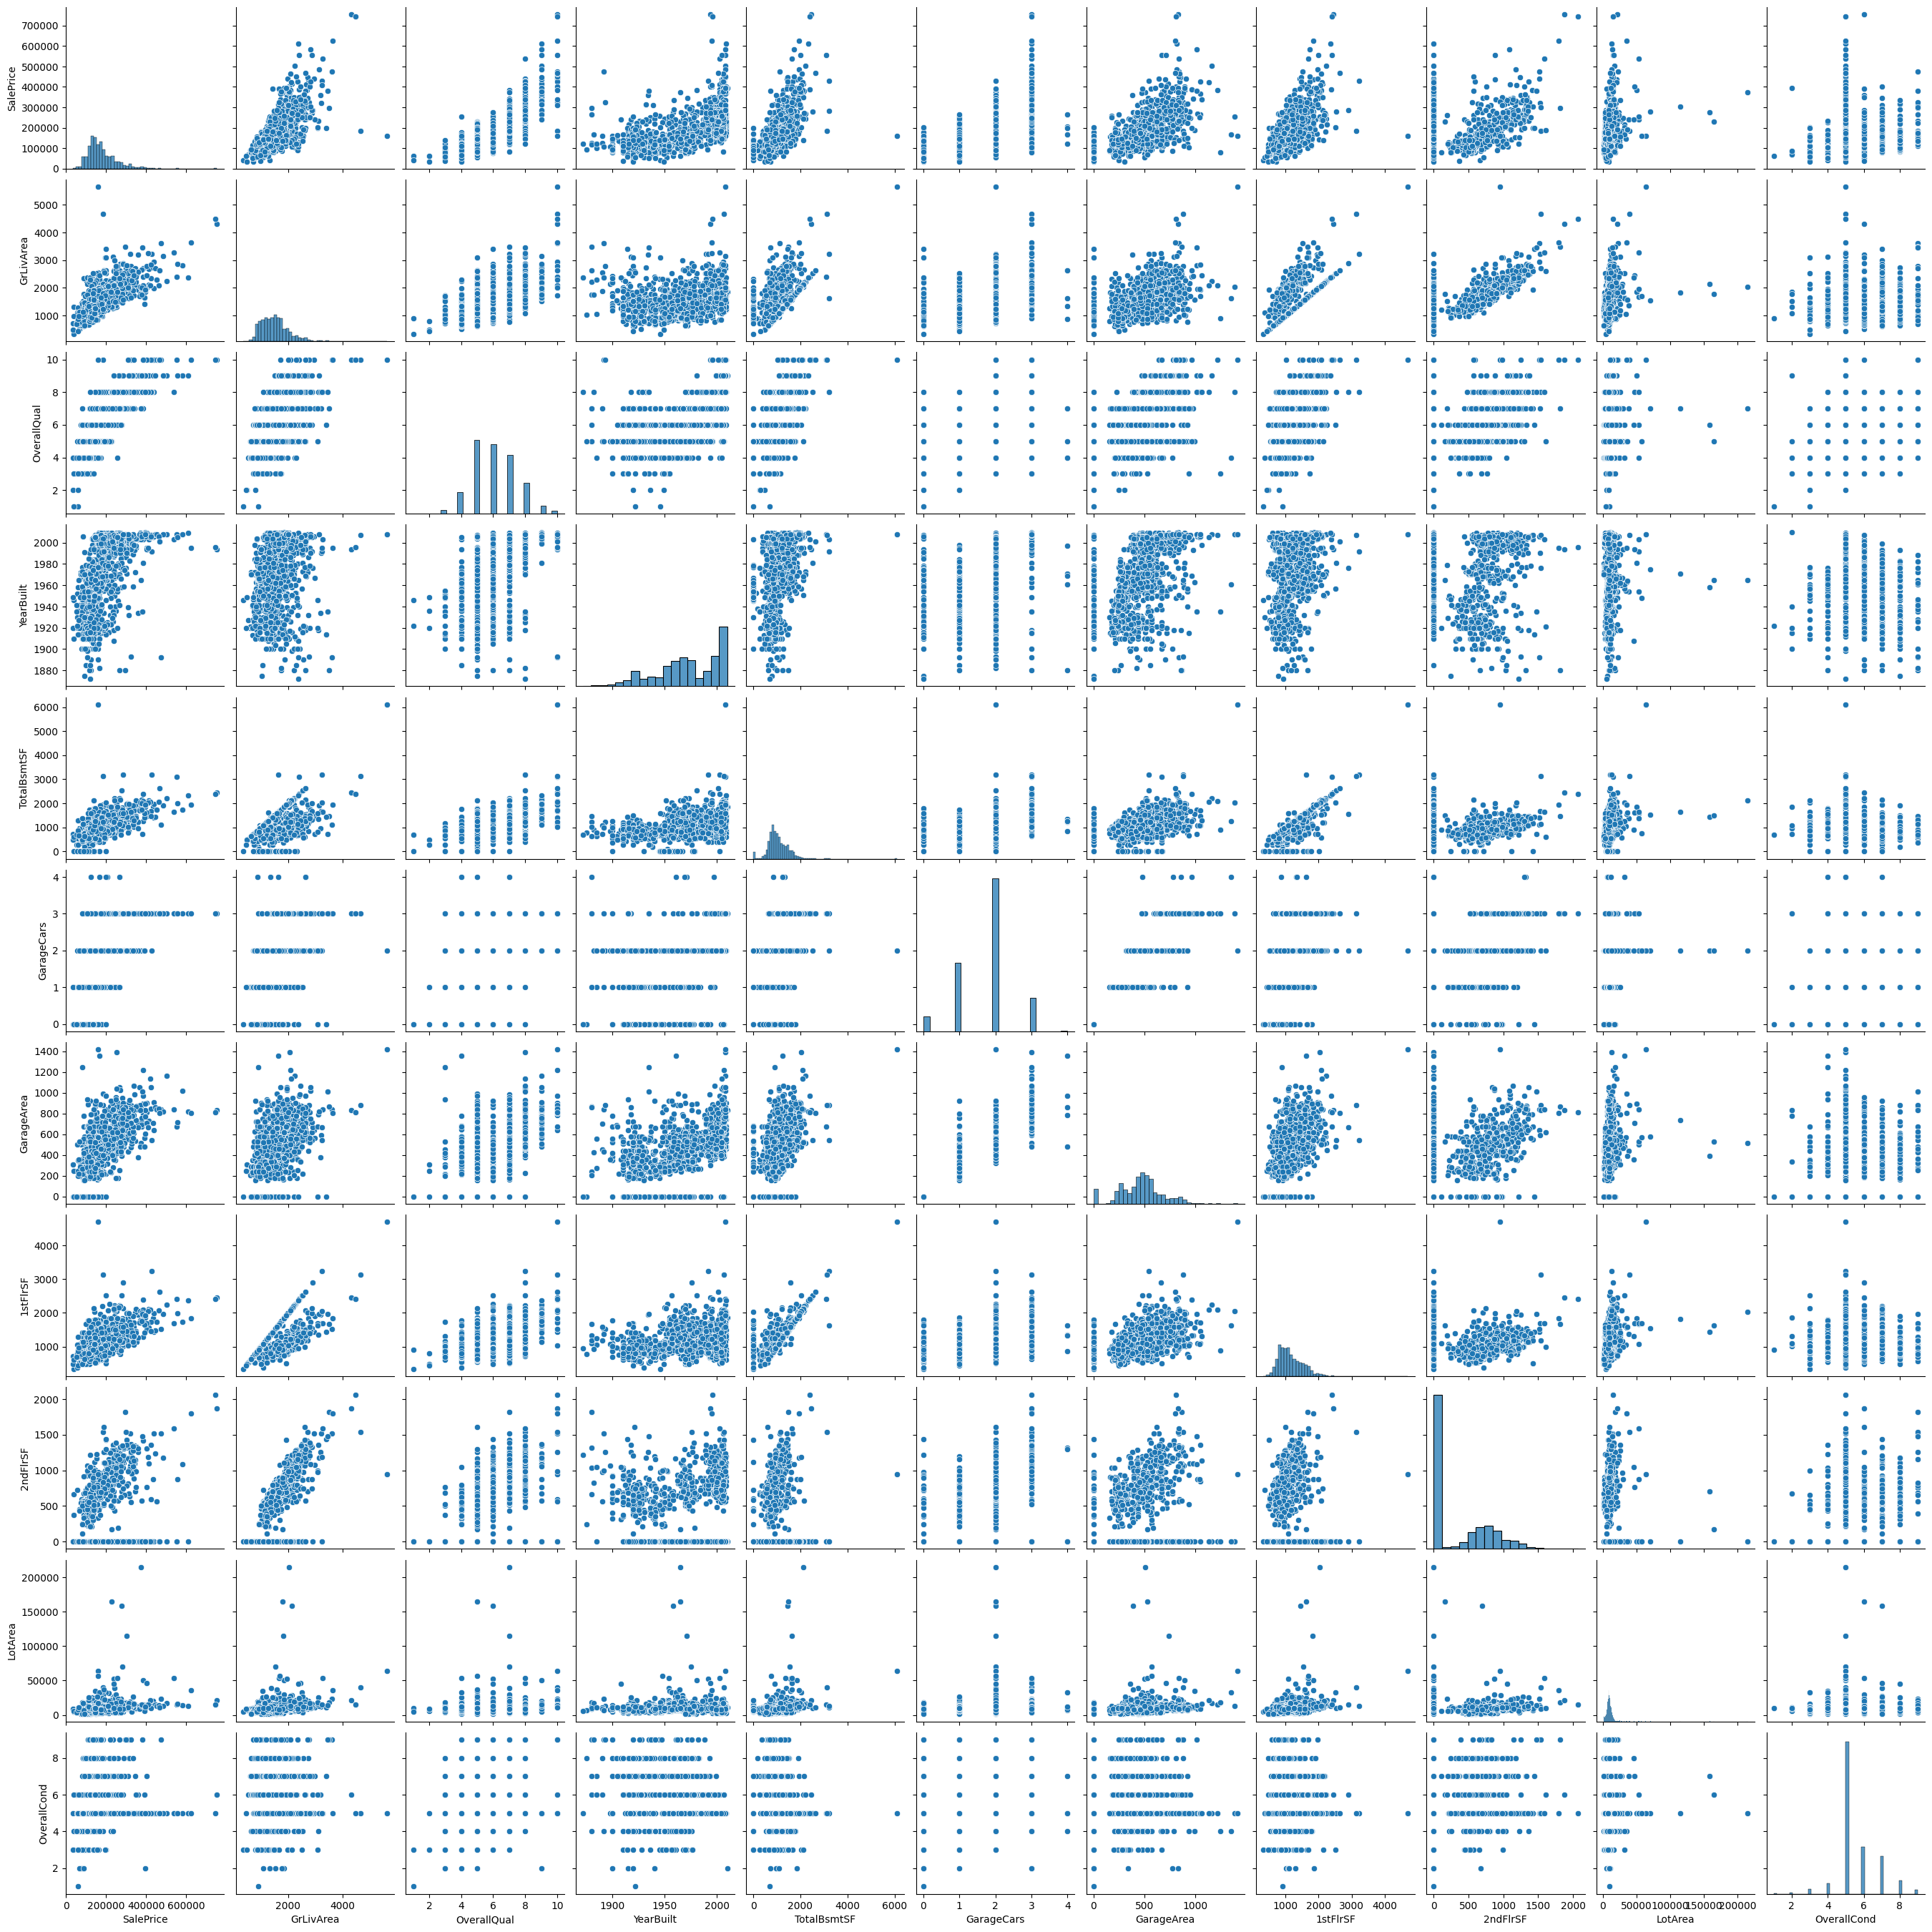

In [43]:
# To explore pairwise relationships between numerical variables
sns.pairplot(df[['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 
                 'GarageCars', 'GarageArea', '1stFlrSF', '2ndFlrSF', 'LotArea', 'OverallCond']])
plt.show()

* A lot of the varuables have positive linear corelation

## Outlier Treatment

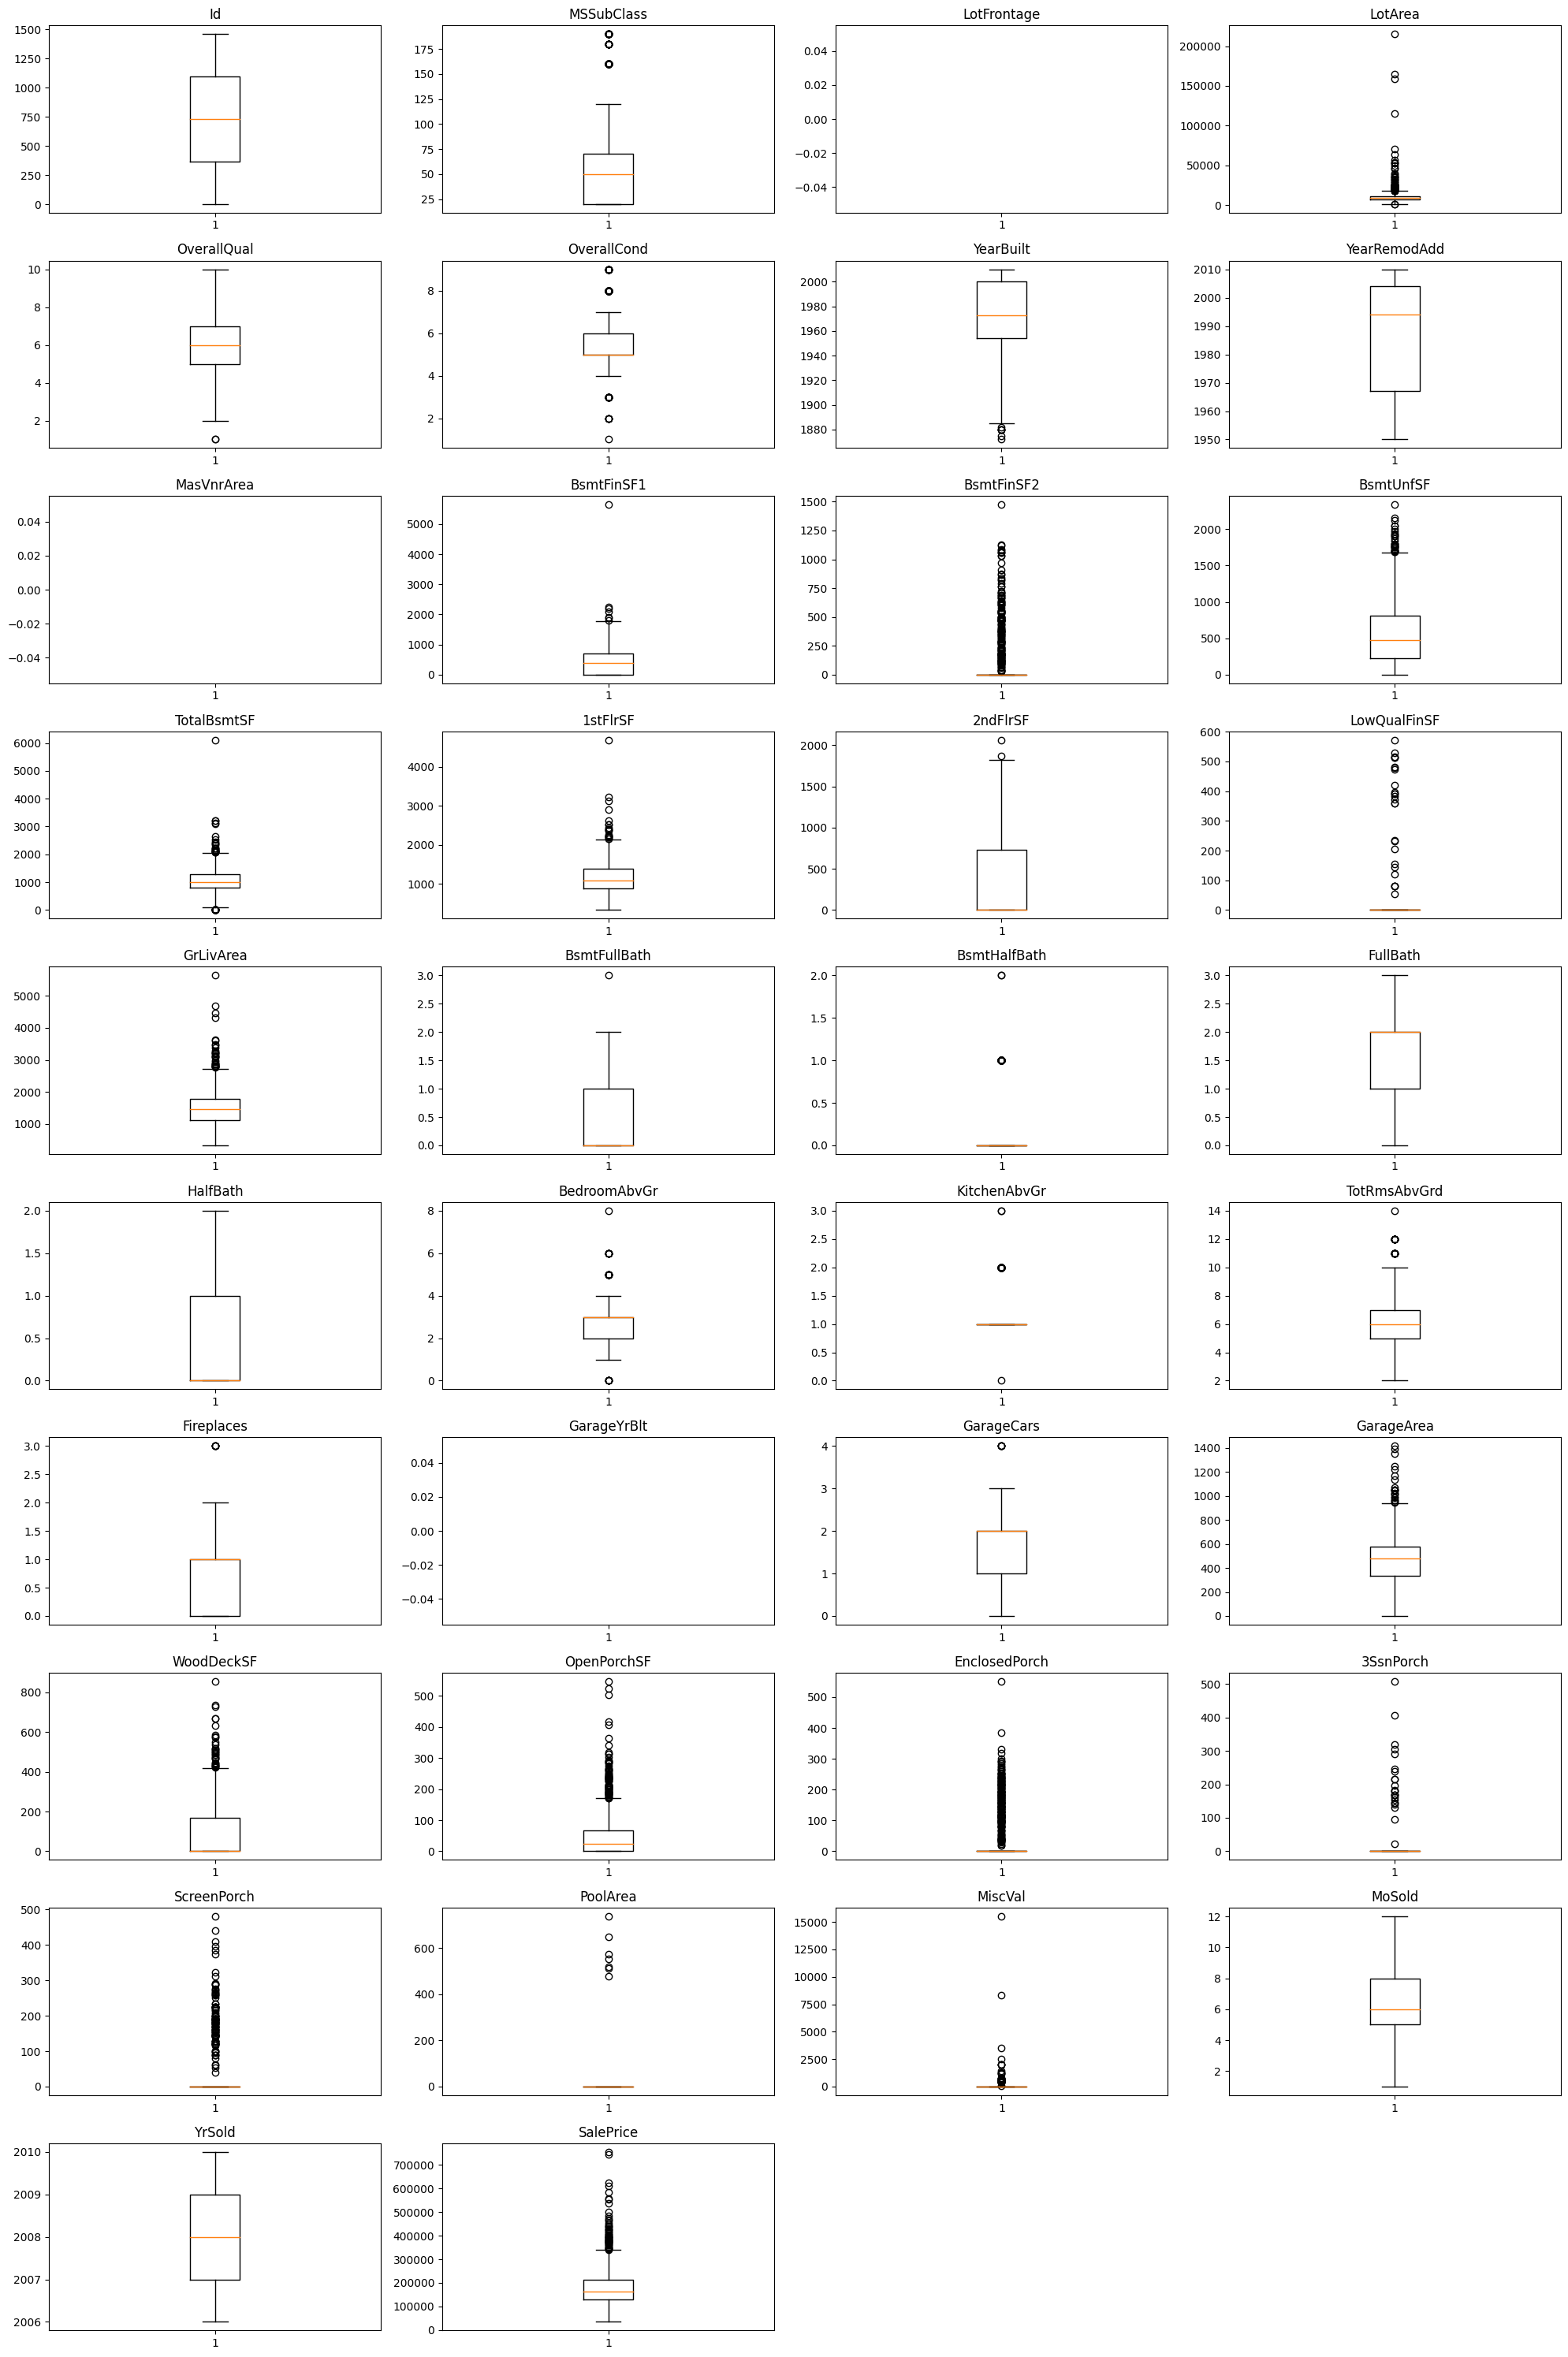

In [44]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
num_cols = len(numerical_col)

# Calculate grid size
num_rows = (num_cols // 4) + 1 if num_cols % 4 != 0 else num_cols // 4

plt.figure(figsize=(20, num_rows * 3))

for i, variable in enumerate(numerical_col):
    plt.subplot(num_rows, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.title(variable)
    plt.tight_layout()

plt.show()

* Some of the ourliers may have valuable information and for now they won't be removed. 
* Further investigation is needed for a base to experiment

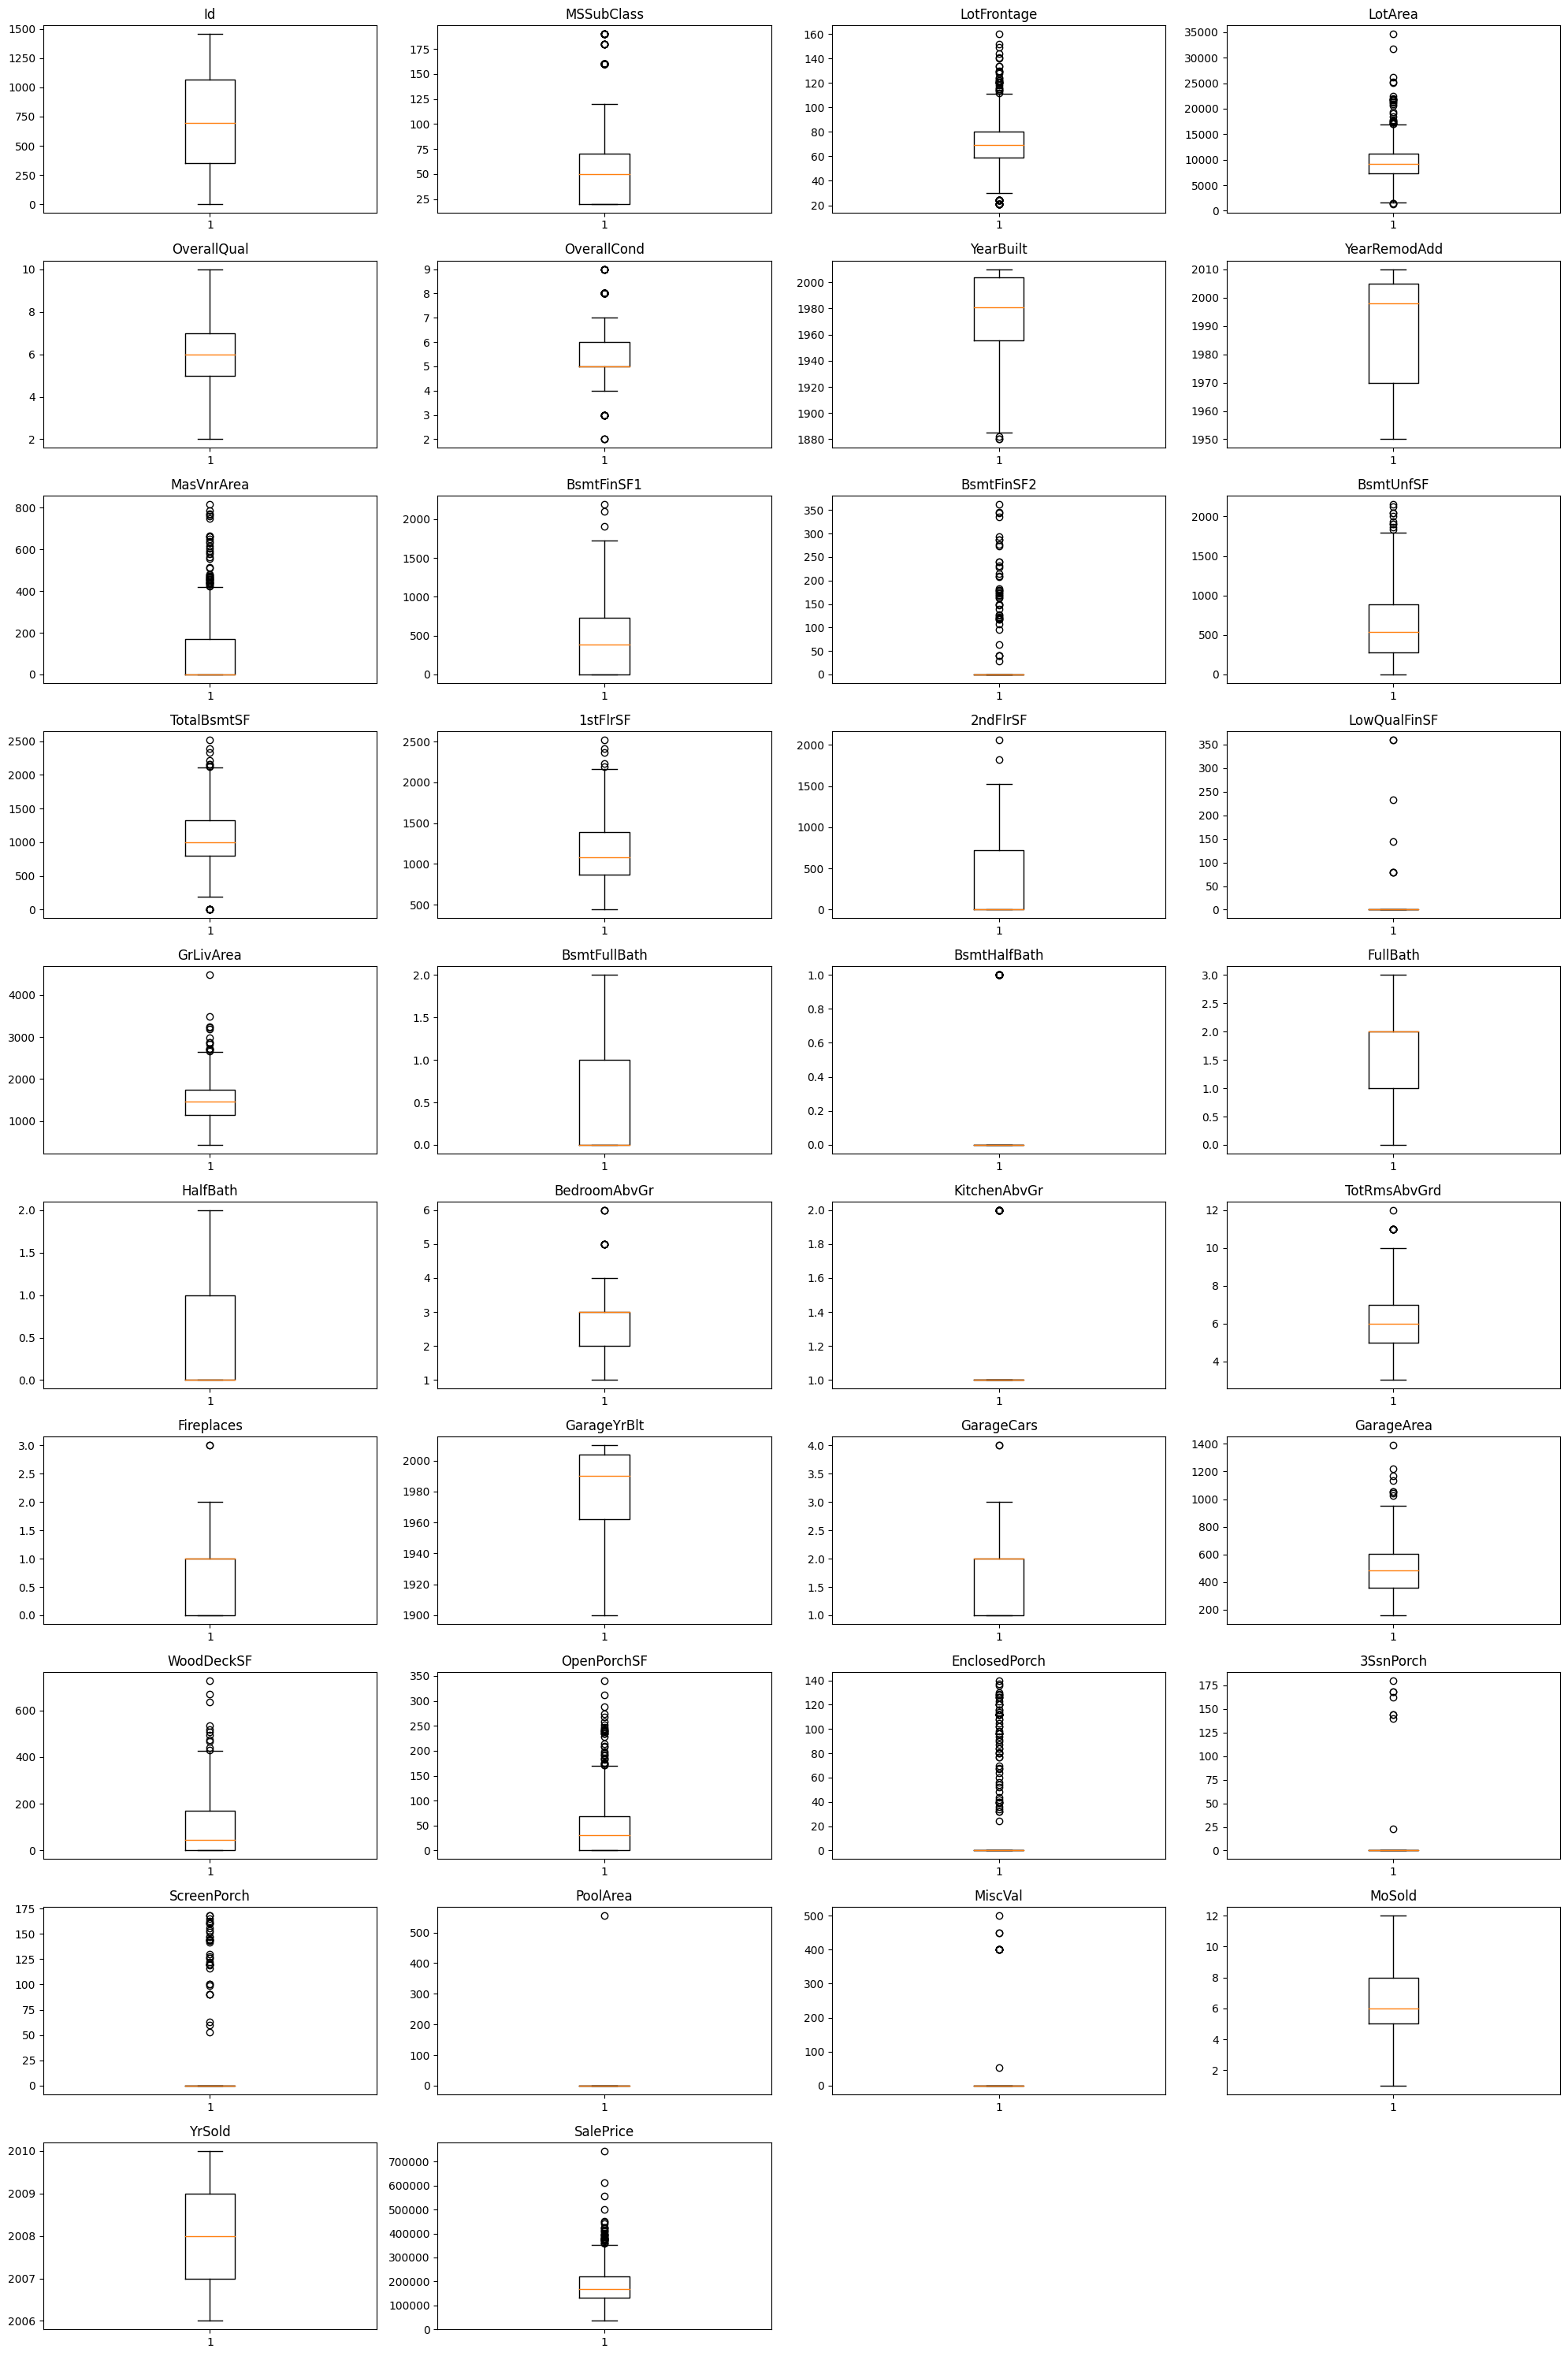

In [45]:
# Define the outlier removal functions
def calculate_whiskers(df, col, iqr_factor=3.0):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - iqr_factor * IQR
    Upper_Whisker = Q3 + iqr_factor * IQR
    return Lower_Whisker, Upper_Whisker

def filter_partial_outliers(df, col, iqr_factor=3.0, remove_fraction=0.5):
    Lower_Whisker, Upper_Whisker = calculate_whiskers(df, col, iqr_factor)
    outliers = df[(df[col] < Lower_Whisker) | (df[col] > Upper_Whisker)]
    non_outliers = df[(df[col] >= Lower_Whisker) & (df[col] <= Upper_Whisker)]
    lower_outliers = outliers[outliers[col] < Lower_Whisker].sort_values(by=col)
    upper_outliers = outliers[outliers[col] > Upper_Whisker].sort_values(by=col, ascending=False)
    num_lower_to_remove = int(len(lower_outliers) * remove_fraction)
    num_upper_to_remove = int(len(upper_outliers) * remove_fraction)
    lower_outliers_to_keep = lower_outliers.iloc[num_lower_to_remove:]
    upper_outliers_to_keep = upper_outliers.iloc[num_upper_to_remove:]
    df_filtered = pd.concat([non_outliers, lower_outliers_to_keep, upper_outliers_to_keep])
    return df_filtered

def filter_partial_outliers_all(df, col_list, iqr_factor=3.0, remove_fraction=0.5):
    for c in col_list:
        if c != 'SalePrice':
            df = filter_partial_outliers(df, c, iqr_factor, remove_fraction)
    return df

# Apply outlier removal to the dataframe
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df_filtered = filter_partial_outliers_all(df.copy(), numerical_col, iqr_factor=3.0, remove_fraction=0.5)

# Calculate grid size for the plots
num_cols = len(numerical_col)
num_rows = (num_cols // 4) + 1 if num_cols % 4 != 0 else num_cols // 4

# Plot after outlier removal
plt.figure(figsize=(20, num_rows * 3))

for i, variable in enumerate(numerical_col):
    plt.subplot(num_rows, 4, i + 1)
    plt.boxplot(df_filtered[variable], whis=1.5)
    plt.title(variable)

plt.tight_layout()
plt.show()

* Used very light outlier removel as the variables have important information

## Featute Engineering

In [46]:
def feature_engineering(df):
    df['PoolQC'].fillna('No Pool', inplace=True)
    df['PoolArea'] = pd.cut(df['PoolArea'], bins=[-1, 0, 250, 600, 1000], labels=['No Area', 'Small', 'Medium', 'Large'])
    df['PoolQC'] = df['PoolQC'].astype(str)
    df['PoolFeature'] = df['PoolQC'] + ' - ' + df['PoolArea'].astype(str)
    
    df['Alley'].fillna('No Alley', inplace=True)
    df['Alley_Street'] = df['Alley'].apply(lambda x: 'With Alley' if x != 'No Alley' else 'No Alley') + '_' + df['Street']

    df['Fence'].fillna('No Fence', inplace=True)
    df['FireplaceQu'].fillna('No Fireplace', inplace=True)
    df['FireplaceQu_Fireplaces'] = df['FireplaceQu'] + '_' + df['Fireplaces'].astype(str)
    df.drop(['FireplaceQu', 'Fireplaces'], axis=1, inplace=True)

    df['MiscFeature'].fillna('No MiscFeature', inplace=True)
    df['MiscFeature_MiscVal'] = df['MiscFeature'] + '_' + df['MiscVal'].astype(str)
    df.drop(['MiscFeature', 'MiscVal'], axis=1, inplace=True)
    
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    df['TotalLivingArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    
    neighborhood_map = {'Neighborhood_A': 1, 'Neighborhood_B': 2, 'Neighborhood_C': 3}
    df['NeighborhoodCode'] = df['Neighborhood'].map(neighborhood_map)
    
    df['OverallRating'] = df['OverallQual'] * df['OverallCond']
    df['GarageSize'] = df['GarageCars'] * df['GarageArea']
    
    df['TotalBsmtSF_1stFlrSF_interaction'] = df['TotalBsmtSF'] * df['1stFlrSF']
    df['GarageCars_GarageArea_interaction'] = df['GarageCars'] * df['GarageArea']
    
    df['YearSold_month'] = pd.to_datetime(df['YrSold'], format='%Y').dt.month
    df['YearSold_quarter'] = pd.to_datetime(df['YrSold'], format='%Y').dt.quarter
    
    columns_to_drop = ['Alley', 'Street', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'PoolArea', 'PoolQC']
    df.drop(columns_to_drop, axis=1, inplace=True)
    
    categorical_cols = ['PoolFeature', 'Alley_Street', 'Fence', 'FireplaceQu_Fireplaces', 
                        'MiscFeature_MiscVal', 'NeighborhoodCode']
    for col in categorical_cols:
        df[col] = df[col].astype('category')
    
    return df

Features:

* PoolQC: Categorical feature indicating the quality of the pool, with missing values filled as 'N' for no pool.

* PoolArea: Categorical feature representing the size of the pool area, categorized into 'N' for no pool, 'Small', and 'Large'.

* Alley_Street: Combined categorical feature indicating whether the property has an alley access and the type of street ('With Alley_Pave', 'With Alley_Grvl', 'No Alley_Pave', 'No Alley_Grvl').

* Fence: Categorical feature indicating the quality of the fence, with missing values filled as 'No Fence'.

* FireplaceQu_Fireplaces: Combined categorical feature indicating the quality of the fireplace and the number of fireplaces in the property.

* MiscFeature_MiscVal: Combined categorical feature indicating the type of miscellaneous feature and its associated value.

* HouseAge: Numeric feature representing the age of the house at the time of sale.

* TotalLivingArea: Numeric feature representing the total living area combining basement, first floor, and second floor square footage.

* NeighborhoodCode: Numeric feature representing neighborhoods mapped to numeric codes ('Neighborhood_A', 'Neighborhood_B', 'Neighborhood_C').

* OverallRating: Numeric feature representing the combined rating of the overall material and finish quality ('OverallQual') and overall condition rating ('OverallCond').

* GarageSize: Numeric feature representing the combined size of the garage in terms of capacity ('GarageCars') and area ('GarageArea').

* TotalBsmtSF_1stFlrSF_interaction: Interaction term representing the product of total basement area ('TotalBsmtSF') and first floor area ('1stFlrSF').

* GarageCars_GarageArea_interaction: Interaction term representing the product of garage capacity ('GarageCars') and garage area ('GarageArea').

* YearSold_month: Temporal feature indicating the month of the year when the house was sold.

* YearSold_quarter: Temporal feature indicating the quarter of the year when the house was sold.

## Model Preprocessing

In [47]:
def preprocess_data(df, df_test):
    # Apply feature engineering
    df = feature_engineering(df)
    df_test = feature_engineering(df_test)
    
    # Step 1: Splitting the Data
    X = df.drop(['SalePrice','Id'], axis=1)
    y = df['SalePrice']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Prepare df_test for prediction
    X_test = df_test.drop(['Id'], axis=1)
    test_ids = df_test['Id']
    
    # Step 2: Handling Missing Values
    numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
    
    # Impute numerical columns
    numerical_imputer = SimpleImputer(strategy='median')
    X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols])
    X_valid[numerical_cols] = numerical_imputer.transform(X_valid[numerical_cols])
    X_test[numerical_cols] = numerical_imputer.transform(X_test[numerical_cols])
    
    # Impute categorical columns
    for col in categorical_cols:
        if X_train[col].notna().any():
            if pd.api.types.is_categorical_dtype(X_train[col]):
                # For categorical columns, add 'Unknown' to categories if not present
                for df in [X_train, X_valid, X_test]:
                    if 'Unknown' not in df[col].cat.categories:
                        df[col] = df[col].cat.add_categories(['Unknown'])
                    df[col] = df[col].fillna('Unknown')
            else:
                imputer = SimpleImputer(strategy='most_frequent')
                X_train[col] = imputer.fit_transform(X_train[[col]]).ravel()
                X_valid[col] = imputer.transform(X_valid[[col]]).ravel()
                X_test[col] = imputer.transform(X_test[[col]]).ravel()
        else:
            # If the column is empty or all NaN, fill with a placeholder value
            for df in [X_train, X_valid, X_test]:
                if pd.api.types.is_categorical_dtype(df[col]):
                    if 'Unknown' not in df[col].cat.categories:
                        df[col] = df[col].cat.add_categories(['Unknown'])
                df[col] = df[col].fillna('Unknown')

    # Step 3: One-Hot Encoding
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    encoder.fit(X[categorical_cols])  # Fit on X to ensure consistent encoding
    
    X_train_encoded = pd.DataFrame(encoder.transform(X_train[categorical_cols]), index=X_train.index)
    X_valid_encoded = pd.DataFrame(encoder.transform(X_valid[categorical_cols]), index=X_valid.index)
    X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]), index=X_test.index)
    
    X_train_encoded.columns = encoder.get_feature_names_out(categorical_cols)
    X_valid_encoded.columns = encoder.get_feature_names_out(categorical_cols)
    X_test_encoded.columns = encoder.get_feature_names_out(categorical_cols)
    
    X_train = X_train.drop(categorical_cols, axis=1)
    X_valid = X_valid.drop(categorical_cols, axis=1)
    X_test = X_test.drop(categorical_cols, axis=1)
    
    X_train = pd.concat([X_train, X_train_encoded], axis=1)
    X_valid = pd.concat([X_valid, X_valid_encoded], axis=1)
    X_test = pd.concat([X_test, X_test_encoded], axis=1)
    
    # Step 4: Ensure Column Alignment
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    
    return X_train, X_valid, y_train, y_valid, X_test, test_ids

# Example usage
X_train, X_valid, y_train, y_valid, X_test, test_ids = preprocess_data(df, df_test)

## Model Building and Hyperparameter Tuning

In [48]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [49]:
#  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

### Building the base models

#### Useing Dtree models + Linear regression due to the linear corelation tha occured in the EDA

In [50]:
# Modify the get_model_score function to work with X_valid and y_valid
def get_model_score(model, X_train, y_train, X_valid, y_valid, flag=True):
    score_list = []
    
    pred_train = model.predict(X_train)
    pred_valid = model.predict(X_valid)
    
    train_r2 = r2_score(y_train, pred_train)
    valid_r2 = r2_score(y_valid, pred_valid)
    train_rmse = np.sqrt(mean_squared_error(y_train, pred_train))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, pred_valid))
    
    score_list.extend((train_r2, valid_r2, train_rmse, valid_rmse))
    
    if flag:
        print("R-square on training set : ", train_r2)
        print("R-square on validation set : ", valid_r2)
        print("RMSE on training set : ", train_rmse)
        print("RMSE on validation set : ", valid_rmse)
    
    return score_list

# List of models to evaluate
models = [
    ('Bagging', BaggingRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('AdaBoost', AdaBoostRegressor(random_state=42)),
    ('Linear Regression', LinearRegression()),
    ('XGB Regressor', XGBRegressor(random_state=42)),
    ('LGBM Regressor', LGBMRegressor(random_state=42)),
]

# For Stacking Regressor
estimators = [
    ('xgb', XGBRegressor(random_state=42)),
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42))
]
models.append(('Stacking', StackingRegressor(estimators=estimators, final_estimator=LinearRegression())))

# Results storage
results = []

for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    # Get scores using get_model_score function
    scores = get_model_score(model, X_train, y_train, X_valid, y_valid, flag=False)
    
    # Get performance metrics using model_performance_regression function
    perf_train = model_performance_regression(model, X_train, y_train)
    perf_valid = model_performance_regression(model, X_valid, y_valid)
    
    # Combine results
    result = {
        'Model': name,
        'Train R2': scores[0],
        'Valid R2': scores[1],
        'Train RMSE': scores[2],
        'Valid RMSE': scores[3],
        'Train Adj R2': perf_train['Adj. R-squared'].values[0],
        'Valid Adj R2': perf_valid['Adj. R-squared'].values[0],
        'Train MAE': perf_train['MAE'].values[0],
        'Valid MAE': perf_valid['MAE'].values[0],
        'Train MAPE': perf_train['MAPE'].values[0],
        'Valid MAPE': perf_valid['MAPE'].values[0]
    }
    
    results.append(result)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

# Optionally, save results to CSV
# results_df.to_csv('model_comparison_results.csv', index=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4166
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 183
[LightGBM] [Info] Start training from score 181441.541952
               Model  Train R2  Valid R2    Train RMSE    Valid RMSE  \
0            Bagging  0.966618  0.878757  14110.494960  30495.481443   
1      Random Forest  0.981076  0.887978  10624.058227  29312.861174   
2  Gradient Boosting  0.971845  0.907799  12958.774260  26593.438647   
3           AdaBoost  0.879726  0.821209  26783.966597  37032.247400   
4  Linear Regression  0.938432  0.832328  19163.142810  35862.177118   
5      XGB Regressor  0.999780  0.910621   1145.845414  26183.261028   
6    

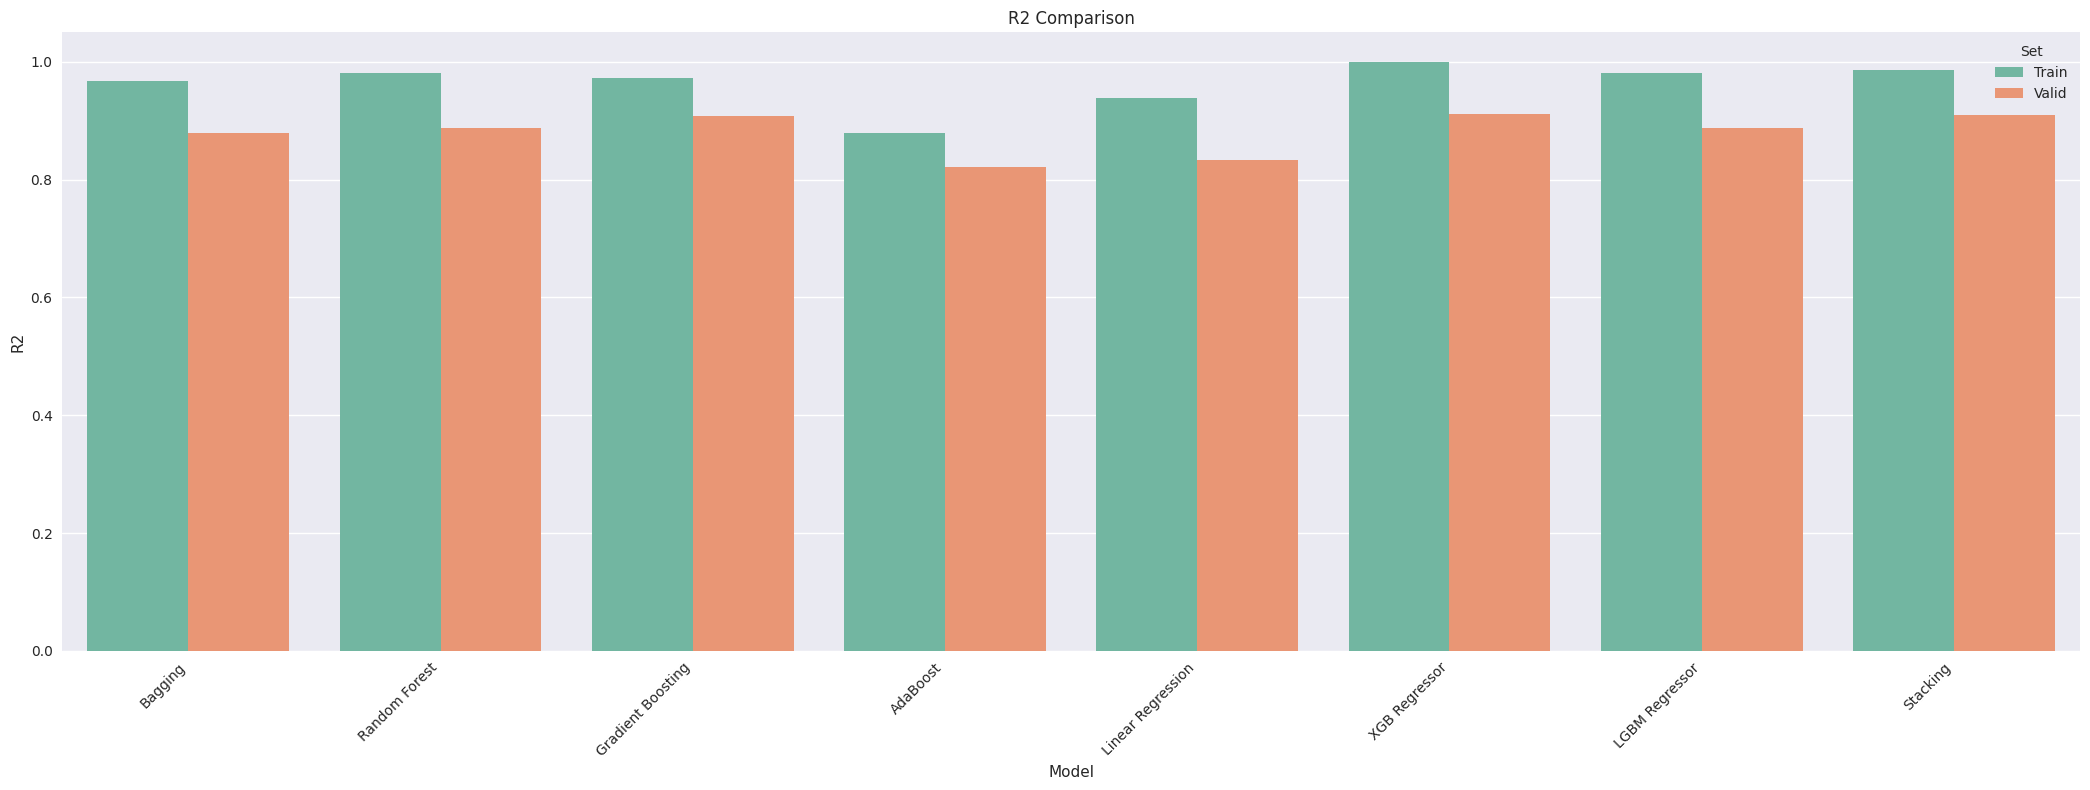

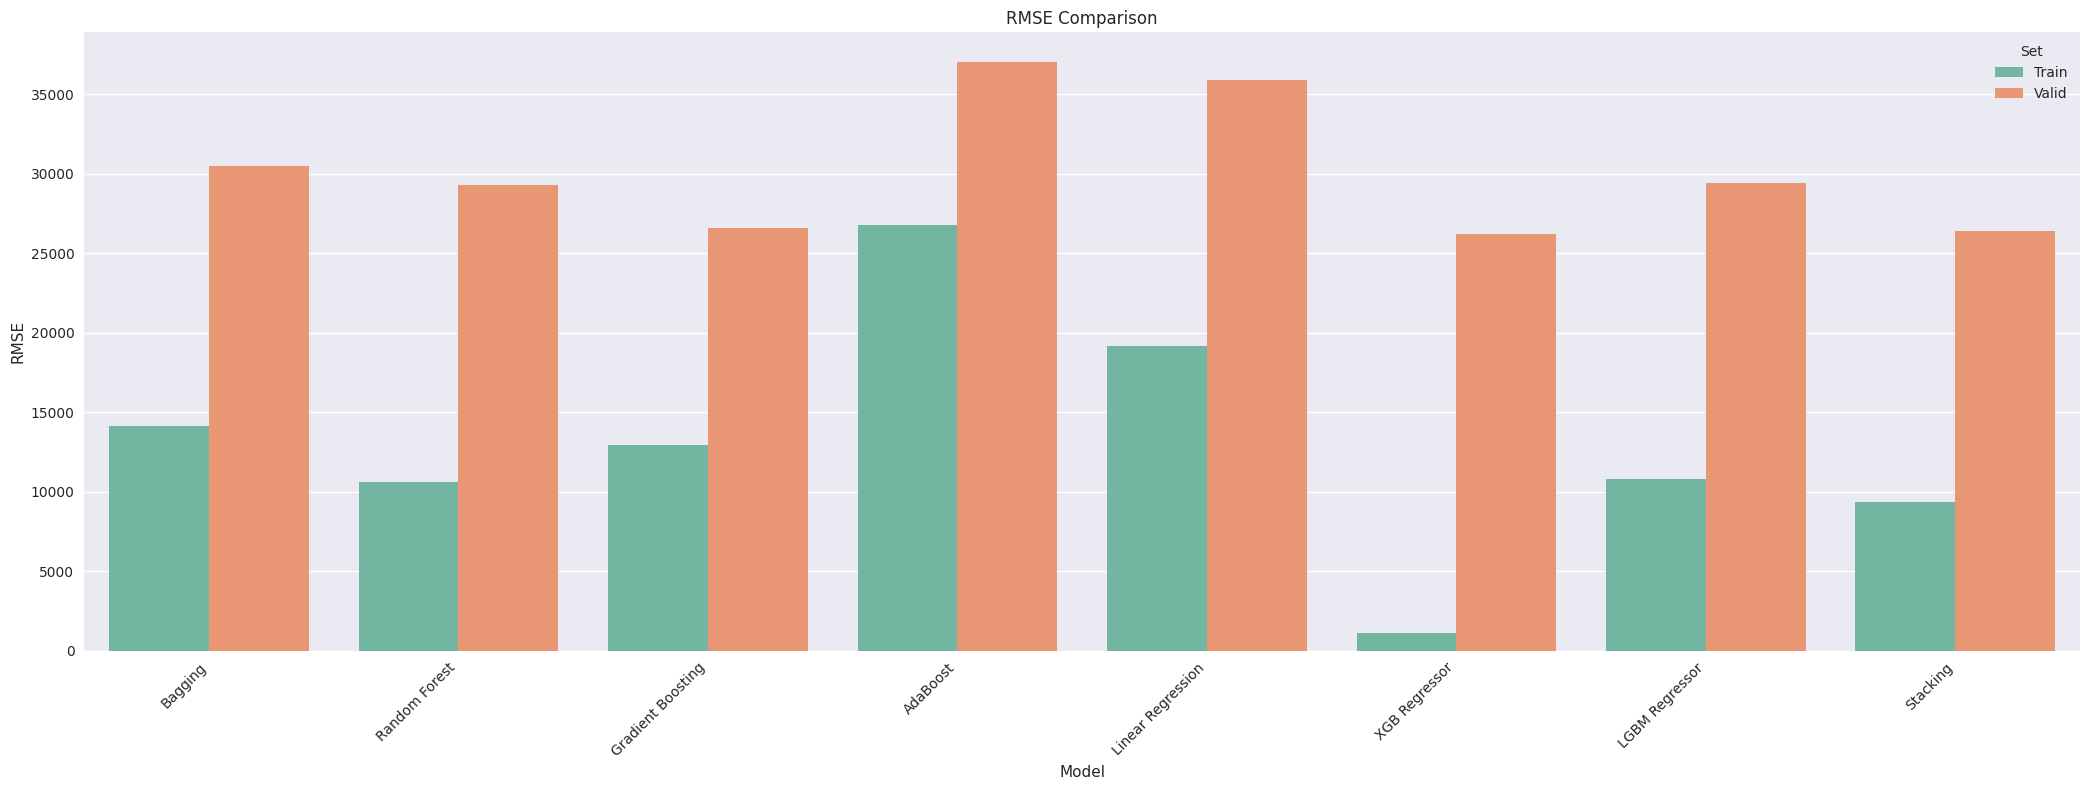

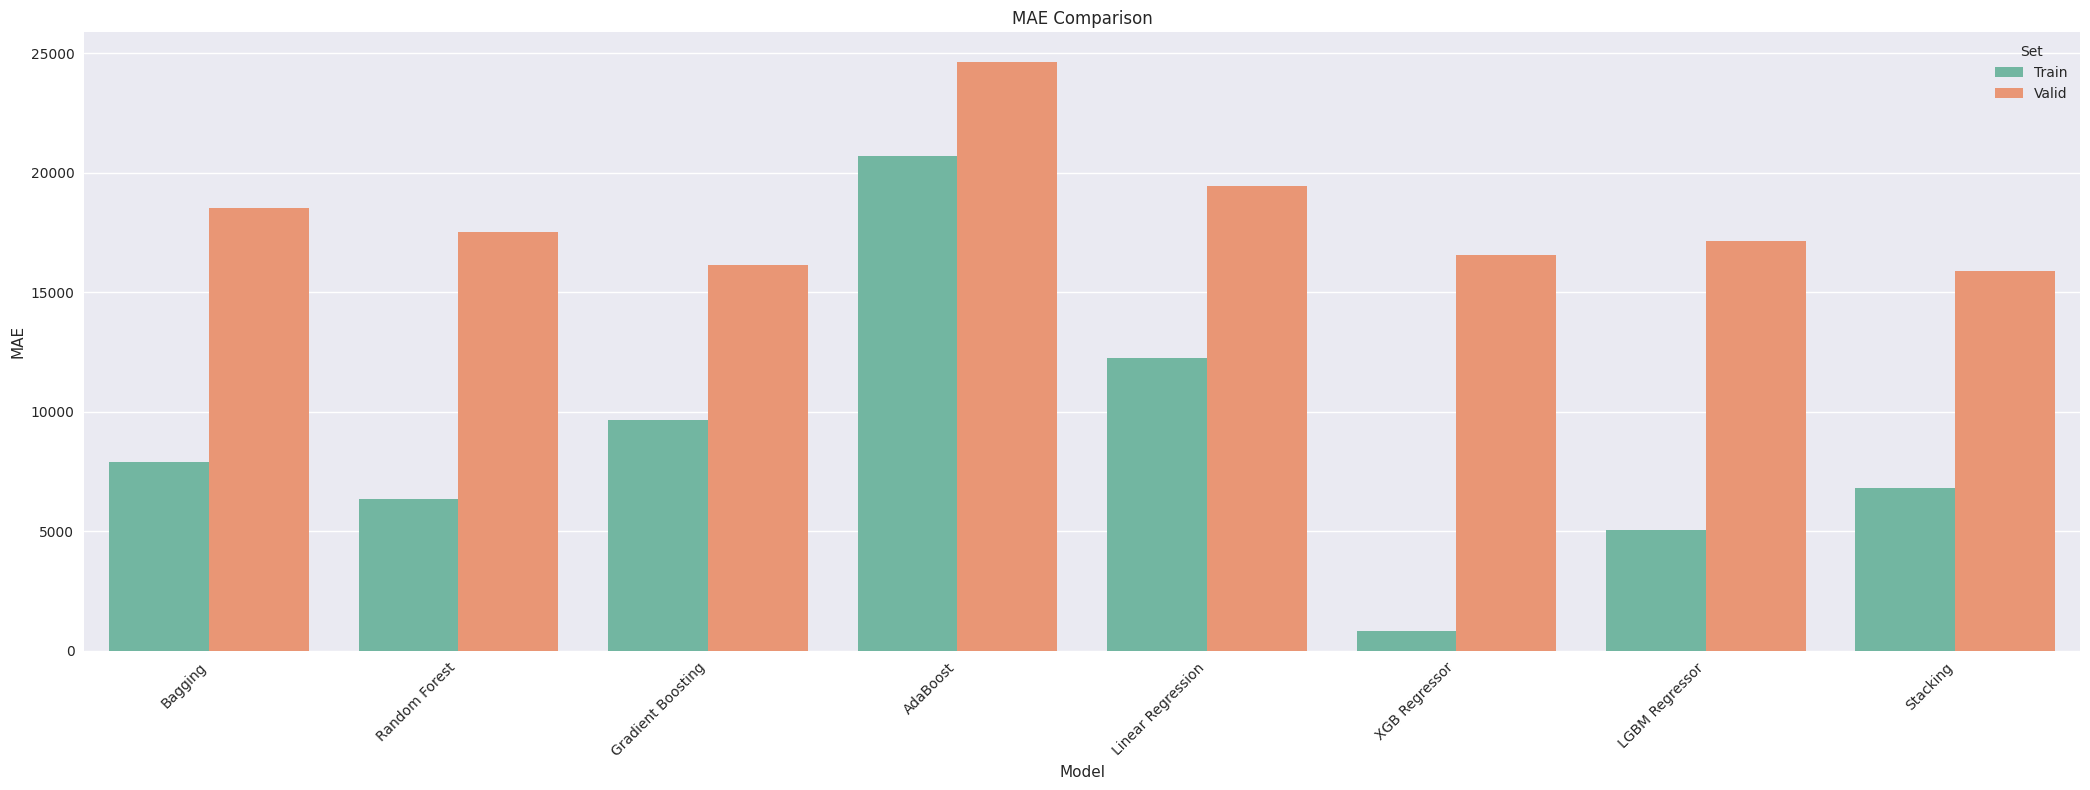

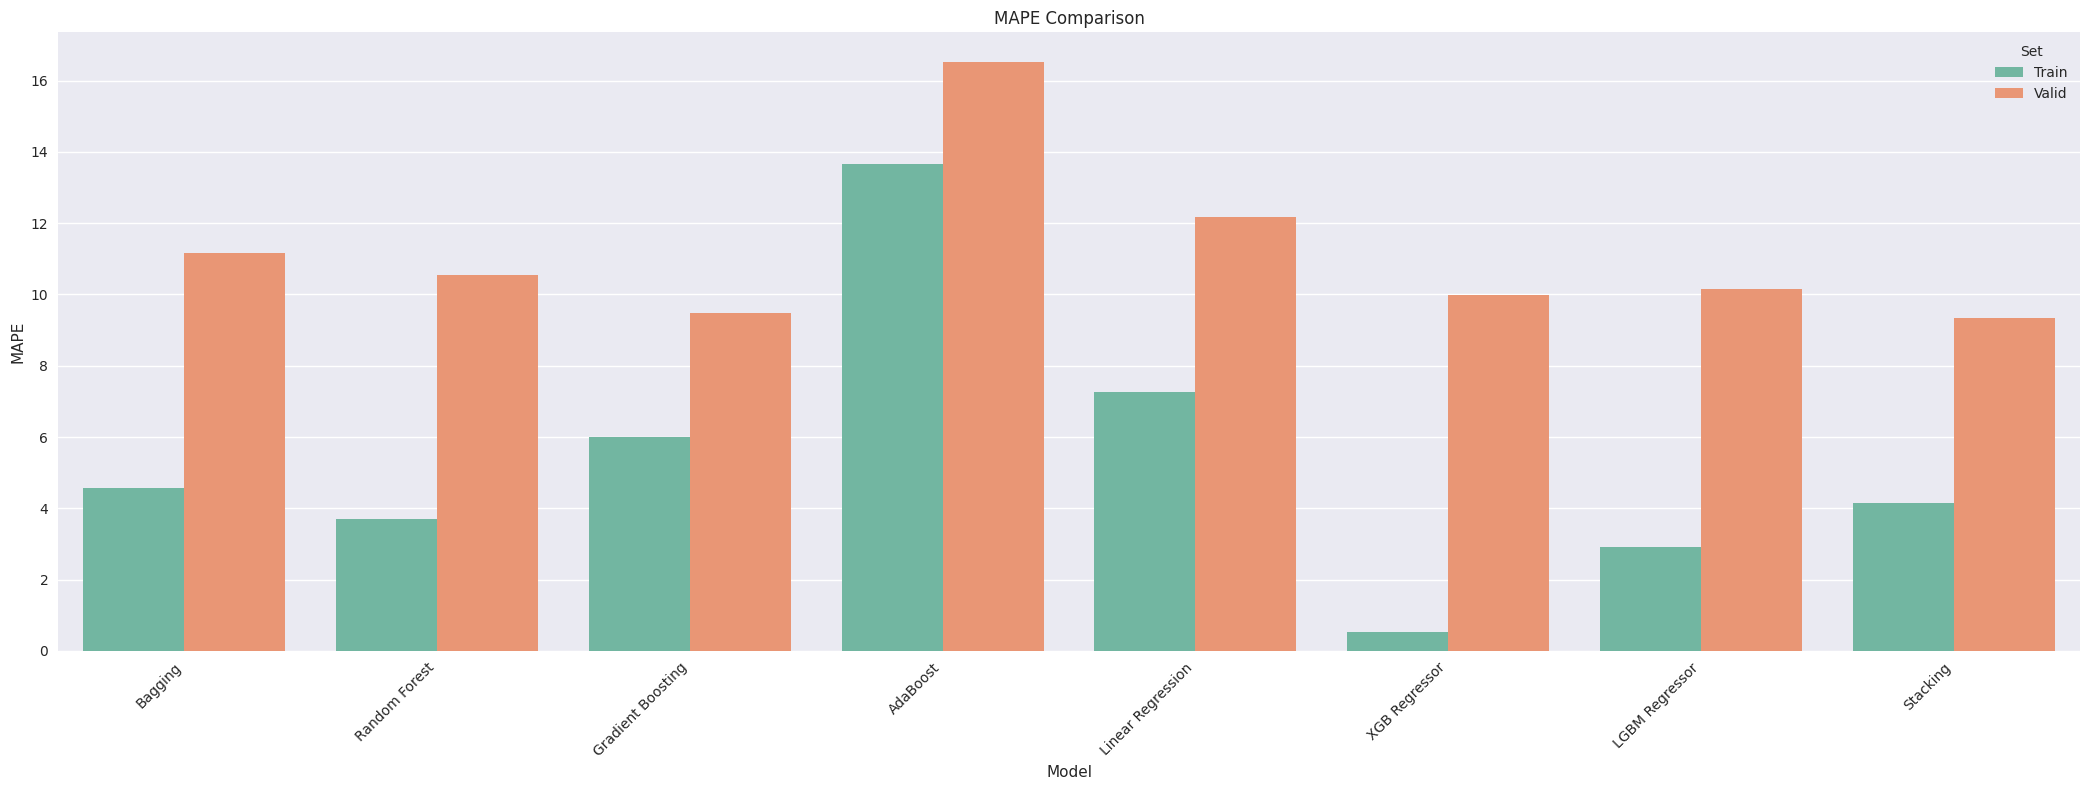

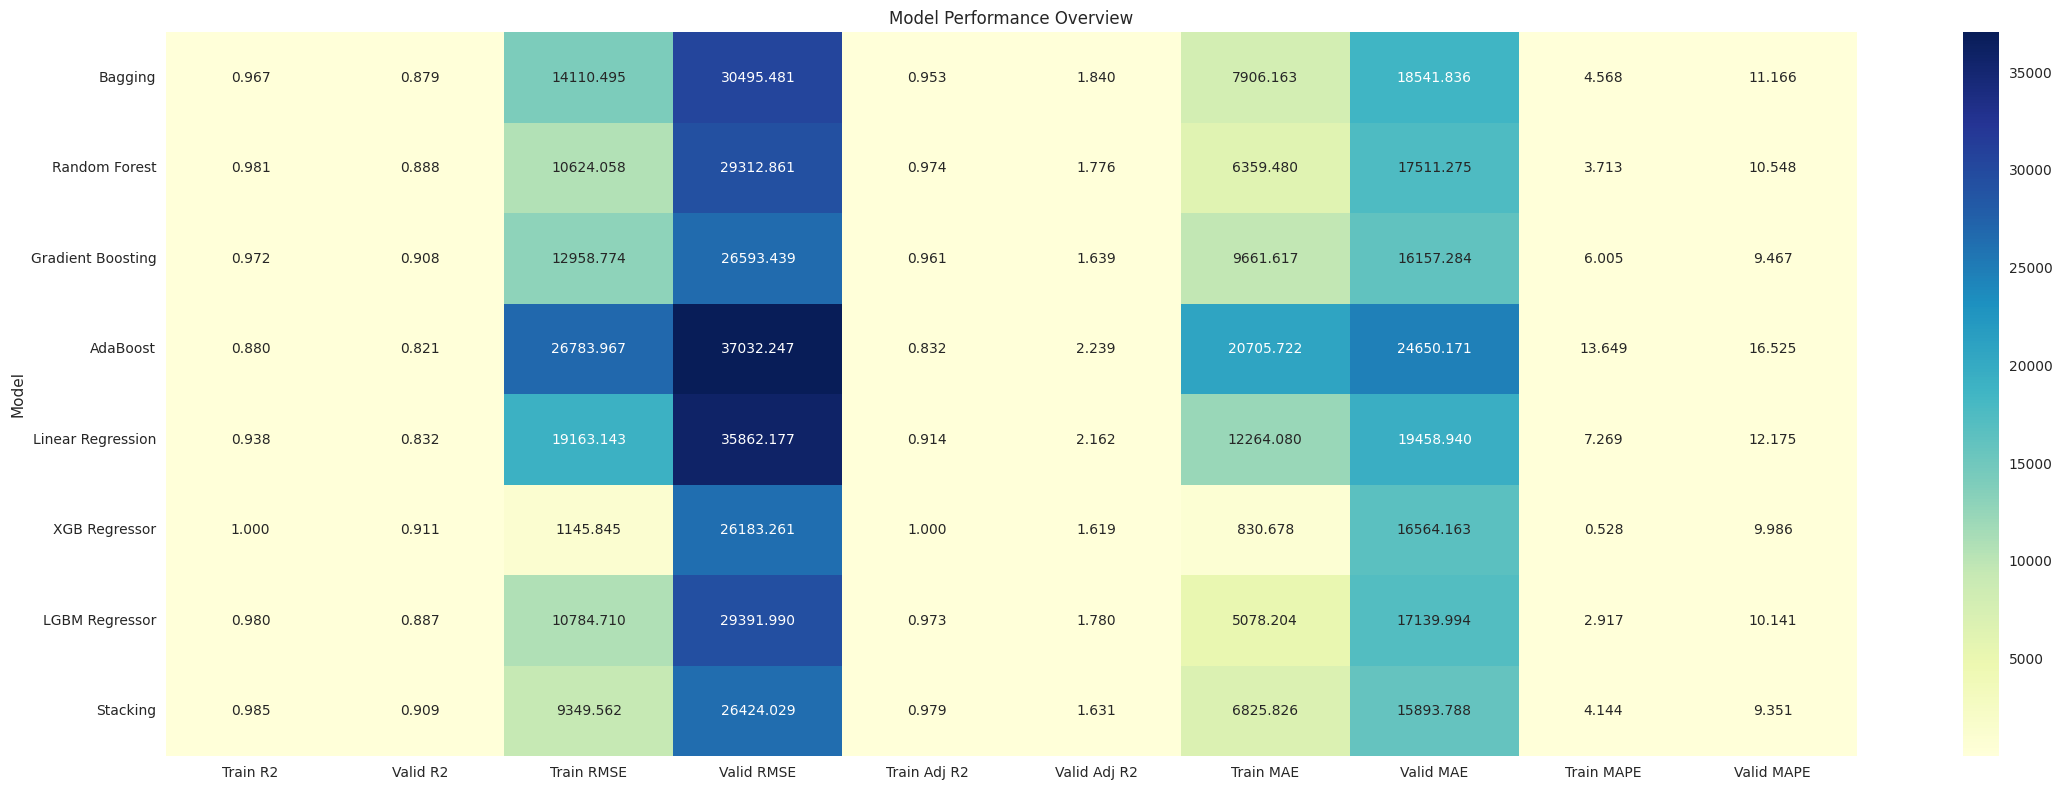

In [51]:
# Reshaping the data for easier plotting
plot_data = results_df.melt(id_vars=['Model'], 
                            value_vars=['Train R2', 'Valid R2', 'Train RMSE', 'Valid RMSE', 
                                        'Train MAE', 'Valid MAE', 'Train MAPE', 'Valid MAPE'])
plot_data['Metric'] = plot_data['variable'].apply(lambda x: x.split()[-1])
plot_data['Set'] = plot_data['variable'].apply(lambda x: x.split()[0])

# Setting up the plotting style
plt.style.use('seaborn')
sns.set_palette("Set2")

# Plotting
metrics = ['R2', 'RMSE', 'MAE', 'MAPE']

for metric in metrics:
    plt.figure(figsize=(21, 8))
    sns.barplot(x='Model', y='value', hue='Set', data=plot_data[plot_data['Metric'] == metric])
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(metric)
    plt.legend(title='Set')
    plt.tight_layout()
    plt.show()

# Performance Overview Heatmap
plt.figure(figsize=(23, 8))
heatmap_data = results_df.set_index('Model')
sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='YlGnBu')
plt.title('Model Performance Overview')
plt.tight_layout()
plt.show()

* The top 3 models are XGboost, GBM and Stacking 

### Tunning the best performing models

#### Tunning XGBoost

In [52]:
# Log-transform the target variable
y_train_log = np.log(y_train)
y_valid_log = np.log(y_valid)

def rmse_log(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log(y_true), np.log(y_pred)))

# Tuning XGB Regressor
xgb_params = {
    'n_estimators': randint(120, 300),
    'learning_rate': uniform(0.005, 0.05),
    'max_depth': randint(2, 8),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(2, 20),
    'subsample': uniform(0.6, 0.95),
    'max_features': ['sqrt', 'log2']
}


xgb = XGBRegressor(random_state=42)
xgb_random_1 = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, 
                                n_iter=60,cv=6,random_state=42, n_jobs=-1, 
                                scoring='neg_mean_squared_error')
xgb_random_1.fit(X_train, y_train_log)

# Best model
xgb_model_1 = xgb_random_1.best_estimator_

# Predictions and evaluation on training and validation sets
train_pred = np.exp(xgb_model_1.predict(X_train))
valid_pred = np.exp(xgb_model_1.predict(X_valid))

train_rmse = rmse_log(y_train, train_pred)
valid_rmse = rmse_log(y_valid, valid_pred)
train_r2 = r2_score(y_train, train_pred)
valid_r2 = r2_score(y_valid, valid_pred)

print("XGB Regressor Results:")
print(f"Train RMSE: {train_rmse}")
print(f"Valid RMSE: {valid_rmse}")
print(f"Train R2: {train_r2}")
print(f"Valid R2: {valid_r2}")

print("\nBest parameters for XGB Regressor:")
print(xgb_random_1.best_params_)

XGB Regressor Results:
Train RMSE: 0.06672352588747782
Valid RMSE: 0.13407575131819044
Train R2: 0.9718406299315167
Valid R2: 0.9096655993857183

Best parameters for XGB Regressor:
{'learning_rate': 0.029280687679311333, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 280, 'subsample': 0.6171715954347448}


* The XGB Regressor model demonstrates strong predictive performance with high R-squared values and low RMSE, indicating it accurately captures the data patterns and generalizes well to unseen data

#### Tunning XGBoost - Feature Elimination

In [53]:
# Initialize RFE with XGBoost
rfe_1 = RFE(estimator=XGBRegressor(**xgb_random_1.best_params_, random_state=42), n_features_to_select=65)

# Fit RFE
rfe_1 = rfe_1.fit(X_train, y_train_log)

# Get selected features
selected_features = X_train.columns[rfe_1.support_].tolist()

# Create new datasets with selected features
X_train_rfe_1 = X_train[selected_features]
X_valid_rfe_1 = X_valid[selected_features]

# Train and evaluate model with RFE selected features
xgb_rfe_1 = XGBRegressor(**xgb_random_1.best_params_, random_state=42)
xgb_rfe_1.fit(X_train_rfe_1, y_train_log)

train_pred_rfe_1 = np.exp(xgb_rfe_1.predict(X_train_rfe_1))
valid_pred_rfe_1 = np.exp(xgb_rfe_1.predict(X_valid_rfe_1))

print("RMSE with RFE selected features:")
print(f"Train RMSE: {rmse_log(y_train, train_pred_rfe_1)}")
print(f"Valid RMSE: {rmse_log(y_valid, valid_pred_rfe_1)}")

# Calculate R2 scores
train_r2_rfe_1 = r2_score(y_train, train_pred_rfe_1)
valid_r2_rfe_1 = r2_score(y_valid, valid_pred_rfe_1)
print(f"Train R2: {train_r2_rfe_1}")
print(f"Valid R2: {valid_r2_rfe_1}")

# Print selected features
print("RFE selected features:")
print(selected_features)

RMSE with RFE selected features:
Train RMSE: 0.06853907836289767
Valid RMSE: 0.13602589833122236
Train R2: 0.9707070966976292
Valid R2: 0.9100571508317943
RFE selected features:
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'OpenPorchSF', 'HouseAge', 'TotalLivingArea', 'OverallRating', 'GarageSize', 'TotalBsmtSF_1stFlrSF_interaction', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Condition1_Artery', 'HouseStyle_SLvl', 'RoofMatl_CompShg', 'Exterior1st_AsbShng', 'Exterior1st_Plywood', 'Exterior2nd_AsbShng', 'Exterior2nd_Stucco', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtExposure_Gd', 'BsmtExp

* The model with RFE-selected features maintains similarly high performance with slightly lower RMSE and higher R-squared on the validation set compared to the first model, suggesting that feature selection has improved its predictive accuracy and generalization

#### Tunning XBBoost Optuna

In [54]:
# Log-transform the target variable
y_train_log = np.log(y_train)
y_valid_log = np.log(y_valid)

def rmse_log(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
                     
def objective(trial: Trial, X, y):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 120, 380),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
        'max_depth': trial.suggest_int('max_depth', 2, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 0.3),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 0.1),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 0.1),
    }

    model = XGBRegressor(random_state=42, **params)
    score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=4, n_jobs=-1)
    rmse = np.sqrt(-score.mean())
    return rmse

study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(lambda trial: objective(trial, X_train, y_train_log), n_trials=100)

print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

# Best model
best_params = study.best_trial.params
xgb_model_2 = XGBRegressor(random_state=42, **best_params)
xgb_model_2.fit(X_train, y_train_log)

# Predictions and evaluation on training and validation sets
train_pred = np.exp(xgb_model_2.predict(X_train))
valid_pred = np.exp(xgb_model_2.predict(X_valid))

train_rmse = rmse_log(y_train, train_pred)
valid_rmse = rmse_log(y_valid, valid_pred)
train_r2 = r2_score(y_train, train_pred)
valid_r2 = r2_score(y_valid, valid_pred)

print("XGB Regressor Results:")
print(f"Train RMSE: {train_rmse}")
print(f"Valid RMSE: {valid_rmse}")
print(f"Train R2: {train_r2}")
print(f"Valid R2: {valid_r2}")                     

[I 2024-07-17 08:40:39,078] A new study created in memory with name: no-name-95c68f34-aa4d-4055-921c-718cba0a66ba
[I 2024-07-17 08:40:47,267] Trial 0 finished with value: 0.13508730335623706 and parameters: {'n_estimators': 342, 'learning_rate': 0.019056406047633236, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.9043520392353942, 'colsample_bytree': 0.7872323444600563, 'gamma': 0.0534258311310735, 'reg_alpha': 1.0078581149786136e-06, 'reg_lambda': 0.00011557627412981866}. Best is trial 0 with value: 0.13508730335623706.
[I 2024-07-17 08:40:50,793] Trial 1 finished with value: 0.14014222401262932 and parameters: {'n_estimators': 185, 'learning_rate': 0.034728730799875054, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.9111270353520609, 'colsample_bytree': 0.7902561237536385, 'gamma': 0.0001014677801819338, 'reg_alpha': 0.0001040938482555092, 'reg_lambda': 3.903805351181953e-07}. Best is trial 0 with value: 0.13508730335623706.
[I 2024-07-17 08:40:53,881] Trial 2 finished 

Best trial: score 0.12944090923950197, params {'n_estimators': 372, 'learning_rate': 0.037228625646611266, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.7982538468300463, 'colsample_bytree': 0.789852335618848, 'gamma': 6.426847948156751e-08, 'reg_alpha': 3.524539046918581e-08, 'reg_lambda': 0.000514995899995029}
XGB Regressor Results:
Train RMSE: 8615.493626383914
Valid RMSE: 25488.12125795736
Train R2: 0.9875553519209074
Valid R2: 0.9153042116185857


* The XGB Regressor model demonstrates very high training performance with a strong R-squared value, but the significantly higher RMSE on the validation set suggests that while it generalizes well, there may be room for improving prediction accuracy on new data

#### Tunning XBBoost Optuna - Feature Elimination

In [55]:
# For the Optuna-optimized model
# Initialize RFE with XGBoost using the best parameters from Optuna
rfe_optuna = RFE(estimator=XGBRegressor(**study.best_trial.params, random_state=42), n_features_to_select=65)

# Fit RFE
rfe_optuna = rfe_optuna.fit(X_train, y_train_log)

# Get selected features
selected_features_optuna = X_train.columns[rfe_optuna.support_].tolist()

# Create new datasets with selected features
X_train_rfe_optuna = X_train[selected_features_optuna]
X_valid_rfe_optuna = X_valid[selected_features_optuna]

# Train and evaluate model with RFE selected features
xgb_rfe_optuna = XGBRegressor(**study.best_trial.params, random_state=42)
xgb_rfe_optuna.fit(X_train_rfe_optuna, y_train_log)

# Make predictions
train_pred_rfe_optuna = np.exp(xgb_rfe_optuna.predict(X_train_rfe_optuna))
valid_pred_rfe_optuna = np.exp(xgb_rfe_optuna.predict(X_valid_rfe_optuna))

# Calculate RMSE
def rmse_log(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

print("RMSE with RFE selected features (Optuna model):")
print(f"Train RMSE: {rmse_log(y_train, train_pred_rfe_optuna)}")
print(f"Valid RMSE: {rmse_log(y_valid, valid_pred_rfe_optuna)}")

# Calculate R2 scores
train_r2_rfe_optuna = r2_score(y_train, train_pred_rfe_optuna)
valid_r2_rfe_optuna = r2_score(y_valid, valid_pred_rfe_optuna)

print(f"Train R2: {train_r2_rfe_optuna}")
print(f"Valid R2: {valid_r2_rfe_optuna}")

# Print selected features
print("RFE selected features (Optuna model):")
print(selected_features_optuna)

# Compare with the Optuna model without RFE
print("\nComparison with Optuna model without RFE:")
print(f"Train RMSE without RFE: {train_rmse}")
print(f"Valid RMSE without RFE: {valid_rmse}")
print(f"Train R2 without RFE: {train_r2}")
print(f"Valid R2 without RFE: {valid_r2}")

# Print the number of features selected
print(f"\nNumber of features selected: {len(selected_features_optuna)}")

RMSE with RFE selected features (Optuna model):
Train RMSE: 8916.702629447012
Valid RMSE: 26697.95826681843
Train R2: 0.9866699783353919
Valid R2: 0.9070729254058452
RFE selected features (Optuna model):
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'HouseAge', 'TotalLivingArea', 'OverallRating', 'GarageSize', 'TotalBsmtSF_1stFlrSF_interaction', 'GarageCars_GarageArea_interaction', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Condition1_Artery', 'Condition1_Norm', 'Exterior1st_AsbShng', 'Exterior1st_BrkFace', 'BsmtQual_Ex', 'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ',

* Compared to the previous model, the Optuna-tuned model with RFE-selected features has a slightly lower Valid RMSE, along with a slightly lower Train R2 and higher Valid R2. This indicates that the Optuna model, while marginally less accurate on the training set, performs better on the validation set, suggesting improved generalization and prediction accuracy on new data

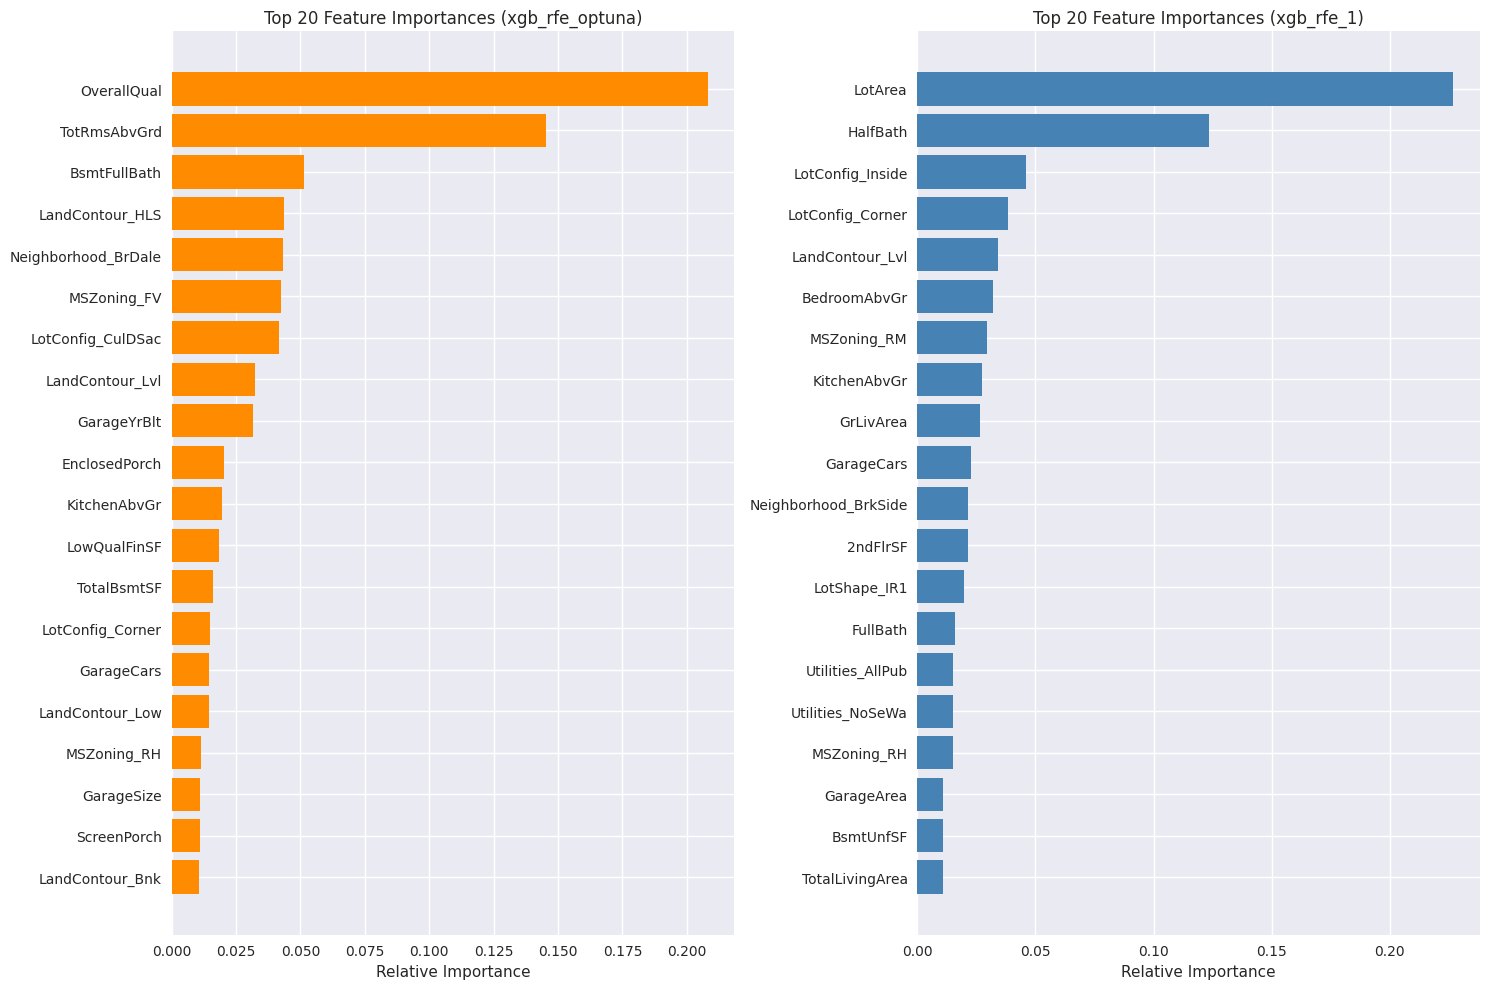

Top 20 Feature Importances (xgb_rfe_optuna):
                Feature  Importance
19          OverallQual    0.208042
18         TotRmsAbvGrd    0.145182
17         BsmtFullBath    0.051555
16      LandContour_HLS    0.043782
15  Neighborhood_BrDale    0.043055
14          MSZoning_FV    0.042385
13    LotConfig_CulDSac    0.041800
12      LandContour_Lvl    0.032371
11          GarageYrBlt    0.031419
10        EnclosedPorch    0.020337
9          KitchenAbvGr    0.019496
8          LowQualFinSF    0.018361
7           TotalBsmtSF    0.016216
6      LotConfig_Corner    0.014702
5            GarageCars    0.014555
4       LandContour_Low    0.014398
3           MSZoning_RH    0.011186
2            GarageSize    0.011165
1           ScreenPorch    0.011127
0       LandContour_Bnk    0.010537

Top 20 Feature Importances (xgb_rfe_1):
                 Feature  Importance
19               LotArea    0.226890
18              HalfBath    0.123643
17      LotConfig_Inside    0.045885
16      Lo

In [56]:
# Get feature importances for both models
feature_names = X_train.columns
importances_optuna = xgb_rfe_optuna.feature_importances_
importances_rfe_1 = xgb_rfe_1.feature_importances_

# Function to get top 20 features
def get_top_features(importances, feature_names, top_n=20):
    indices = np.argsort(importances)[-top_n:]
    sorted_indices = indices[np.argsort(importances[indices])]
    top_features = [(feature_names[i], importances[i]) for i in sorted_indices]
    return top_features

# Get top 20 features for both models
top_features_optuna = get_top_features(importances_optuna, feature_names)
top_features_rfe_1 = get_top_features(importances_rfe_1, feature_names)

# Plotting top 20 features of both models
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.barh(range(len(top_features_optuna)), [importance for _, importance in top_features_optuna], color="darkorange", align="center")
plt.yticks(range(len(top_features_optuna)), [feature for feature, _ in top_features_optuna])
plt.xlabel("Relative Importance")
plt.title("Top 20 Feature Importances (xgb_rfe_optuna)")

plt.subplot(1, 2, 2)
plt.barh(range(len(top_features_rfe_1)), [importance for _, importance in top_features_rfe_1], color="steelblue", align="center")
plt.yticks(range(len(top_features_rfe_1)), [feature for feature, _ in top_features_rfe_1])
plt.xlabel("Relative Importance")
plt.title("Top 20 Feature Importances (xgb_rfe_1)")

plt.tight_layout()
plt.show()

# Creating DataFrames for both models
top_features_df_optuna = pd.DataFrame(top_features_optuna, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
top_features_df_rfe_1 = pd.DataFrame(top_features_rfe_1, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

# Display the DataFrames
print("Top 20 Feature Importances (xgb_rfe_optuna):")
print(top_features_df_optuna)

print("\nTop 20 Feature Importances (xgb_rfe_1):")
print(top_features_df_rfe_1)

#### Tunning GBM

In [57]:
# Log-transform the target variable
y_train_log = np.log(y_train)
y_valid_log = np.log(y_valid)

def rmse_log(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log(y_true), np.log(y_pred)))

# Tuning Gradient Boosting Regressor
gb_params = {
    'n_estimators': randint(100, 400),
    'learning_rate': uniform(0.005, 0.05),
    'max_depth': randint(2, 8),
    'min_samples_split': randint(5, 50),
    'min_samples_leaf': randint(2, 20),
    'subsample': uniform(0.6, 0.95),
    'max_features': ['sqrt', 'log2']
}

gb = GradientBoostingRegressor(random_state=42)
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=gb_params, 
                               n_iter=60, cv=6, random_state=42, n_jobs=-1, 
                               scoring='neg_mean_squared_error')
gb_random.fit(X_train, y_train_log)

# Best model
gb_model = gb_random.best_estimator_

# Predictions and evaluation on training and validation sets
train_pred = np.exp(gb_model.predict(X_train))
valid_pred = np.exp(gb_model.predict(X_valid))

train_rmse = rmse_log(y_train, train_pred)
valid_rmse = rmse_log(y_valid, valid_pred)
train_r2 = r2_score(y_train, train_pred)
valid_r2 = r2_score(y_valid, valid_pred)

print("Gradient Boosting Results:")
print(f"Train RMSE: {train_rmse}")
print(f"Valid RMSE: {valid_rmse}")
print(f"Train R2: {train_r2}")
print(f"Valid R2: {valid_r2}")

print("\nBest parameters for Gradient Boosting:")
print(gb_random.best_params_)

Gradient Boosting Results:
Train RMSE: 0.06302819043178316
Valid RMSE: 0.12697033277565045
Train R2: 0.9773514713532905
Valid R2: 0.9121551569566506

Best parameters for Gradient Boosting:
{'learning_rate': 0.05488702425244709, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 319, 'subsample': 0.6489048136874899}


#### Tunning GBM - Fearure Elimination

In [58]:
# Initialize RFE with the best Gradient Boosting model
rfe = RFE(estimator=GradientBoostingRegressor(**gb_random.best_params_, random_state=42), n_features_to_select=58)

# Fit RFE
rfe = rfe.fit(X_train, y_train_log)

# Get selected features
selected_features = X_train.columns[rfe.support_].tolist()

# Create new datasets with selected features
X_train_rfe = X_train[selected_features]
X_valid_rfe = X_valid[selected_features]

# Train and evaluate model with RFE selected features
gb_rfe = GradientBoostingRegressor(**gb_random.best_params_, random_state=42)
gb_rfe.fit(X_train_rfe, y_train_log)

# Make predictions
train_pred_rfe = np.exp(gb_rfe.predict(X_train_rfe))
valid_pred_rfe = np.exp(gb_rfe.predict(X_valid_rfe))

# Calculate RMSE
print("RMSE with RFE selected features:")
print(f"Train RMSE: {rmse_log(y_train, train_pred_rfe)}")
print(f"Valid RMSE: {rmse_log(y_valid, valid_pred_rfe)}")

# Calculate R2 scores
train_r2_rfe = r2_score(y_train, train_pred_rfe)
valid_r2_rfe = r2_score(y_valid, valid_pred_rfe)

print(f"Train R2: {train_r2_rfe}")
print(f"Valid R2: {valid_r2_rfe}")

# Print selected features
print("RFE selected features:")
print(selected_features)

# Compare with the model without RFE
print("\nComparison with model without RFE:")
print(f"Train RMSE without RFE: {train_rmse}")
print(f"Valid RMSE without RFE: {valid_rmse}")
print(f"Train R2 without RFE: {train_r2}")
print(f"Valid R2 without RFE: {valid_r2}")

# Print the number of features selected
print(f"\nNumber of features selected: {len(selected_features)}")

RMSE with RFE selected features:
Train RMSE: 0.056703557589101145
Valid RMSE: 0.12875702806339115
Train R2: 0.9824837724432133
Valid R2: 0.9236226850584427
RFE selected features:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'HouseAge', 'TotalLivingArea', 'OverallRating', 'GarageSize', 'TotalBsmtSF_1stFlrSF_interaction', 'GarageCars_GarageArea_interaction', 'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Condition1_Norm', 'Exterior1st_BrkFace', 'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ', 'BsmtFinType1_Unf', 'HeatingQC_Ex', 'CentralAir_N', 'CentralAir_Y', 'KitchenQual_Ex', 'KitchenQual_TA', 'Fu

* Compared to the Gradient Boosting model, the model with RFE-selected features has a slightly lower Train RMSE and higher Train R2, indicating better performance on the training set. However, it has a slightly higher Valid RMSE and similar Valid R2, suggesting that while the RFE model fits the training data more closely, its generalization to new data is slightly less accurate but still very strong

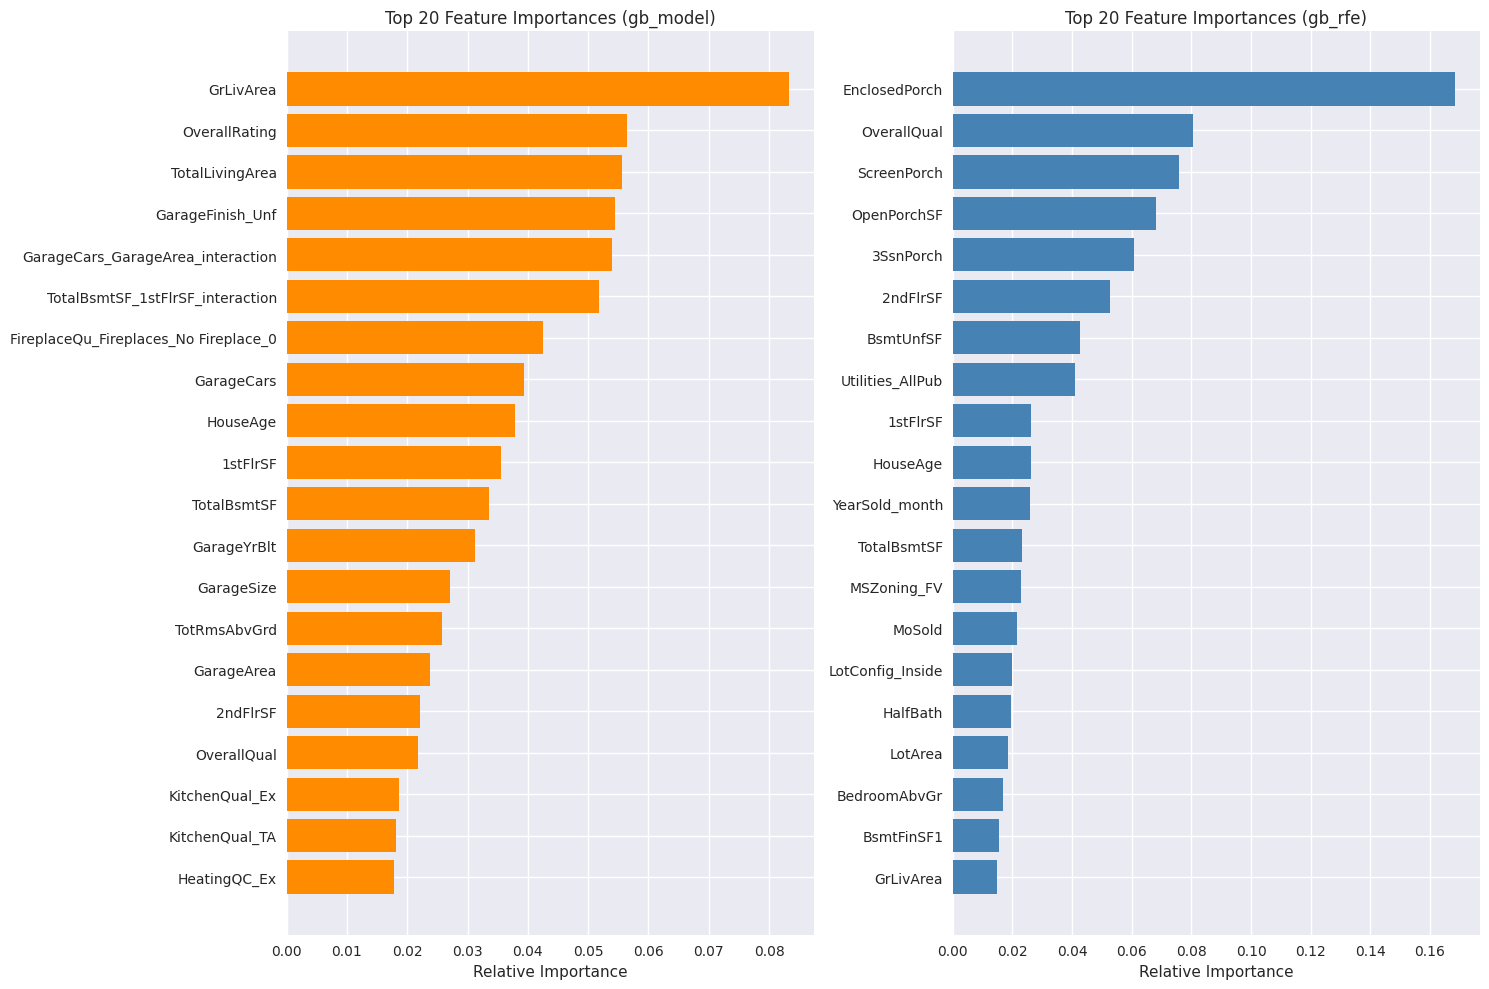

Top 20 Feature Importances (gb_model):
                                  Feature  Importance
19                              GrLivArea    0.083255
18                          OverallRating    0.056518
17                        TotalLivingArea    0.055575
16                       GarageFinish_Unf    0.054461
15      GarageCars_GarageArea_interaction    0.053950
14       TotalBsmtSF_1stFlrSF_interaction    0.051841
13  FireplaceQu_Fireplaces_No Fireplace_0    0.042490
12                             GarageCars    0.039337
11                               HouseAge    0.037808
10                               1stFlrSF    0.035500
9                             TotalBsmtSF    0.033556
8                             GarageYrBlt    0.031192
7                              GarageSize    0.027125
6                            TotRmsAbvGrd    0.025743
5                              GarageArea    0.023718
4                                2ndFlrSF    0.022095
3                             OverallQual  

In [59]:
feature_names = X_train.columns
importances_gb_model = gb_model.feature_importances_
importances_gb_rfe = gb_rfe.feature_importances_

# Function to get top 20 features
def get_top_features(importances, feature_names, top_n=20):
    indices = np.argsort(importances)[-top_n:]
    sorted_indices = indices[np.argsort(importances[indices])]
    top_features = [(feature_names[i], importances[i]) for i in sorted_indices]
    return top_features

# Get top 20 features for both models
top_features_gb_model = get_top_features(importances_gb_model, feature_names)
top_features_gb_rfe = get_top_features(importances_gb_rfe, feature_names)

# Plotting top 20 features of both models
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.barh(range(len(top_features_gb_model)), [importance for _, importance in top_features_gb_model], color="darkorange", align="center")
plt.yticks(range(len(top_features_gb_model)), [feature for feature, _ in top_features_gb_model])
plt.xlabel("Relative Importance")
plt.title("Top 20 Feature Importances (gb_model)")

plt.subplot(1, 2, 2)
plt.barh(range(len(top_features_gb_rfe)), [importance for _, importance in top_features_gb_rfe], color="steelblue", align="center")
plt.yticks(range(len(top_features_gb_rfe)), [feature for feature, _ in top_features_gb_rfe])
plt.xlabel("Relative Importance")
plt.title("Top 20 Feature Importances (gb_rfe)")

plt.tight_layout()
plt.show()

# Creating DataFrames for both models
top_features_df_gb_model = pd.DataFrame(top_features_gb_model, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
top_features_df_gb_rfe = pd.DataFrame(top_features_gb_rfe, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

# Display the DataFrames
print("Top 20 Feature Importances (gb_model):")
print(top_features_df_gb_model)

print("\nTop 20 Feature Importances (gb_rfe):")
print(top_features_df_gb_rfe)

Top 3 Features from gb_model:

* GrLivArea_OverallQual (0.0895): Interaction term indicating the importance of living area and overall quality combined
* OverallQual_TotalLivingArea (0.0860): Interaction between overall quality and total living area underscores the importance of both quality and space in pricing homes
* TotalLivingArea (0.0615): Indicates the overall living area continues to be a strong predictor of home prices

## Random forest

In [60]:
# Log-transform the target variable
y_train_log = np.log(y_train)
y_valid_log = np.log(y_valid)

# Define RMSE function for log-transformed data
def rmse_log(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log(y_true), np.log(y_pred)))

# Define parameter grid for Random Forest
rf_params = {
    'n_estimators': randint(100, 300),  # Reduced upper limit for efficiency
    'max_depth': randint(2, 10),  # Extended range to 10
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],  # Added None for considering all features
    'bootstrap': [True, False]
}

# Instantiate the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV for Random Forest
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, 
                               n_iter=50, cv=5, random_state=42, n_jobs=-1, 
                               scoring='neg_mean_squared_error')

# Fit the model
rf_random.fit(X_train, y_train_log)

# Best model
rf_model = rf_random.best_estimator_

# Predictions and evaluation on training and validation sets
train_pred = np.exp(rf_model.predict(X_train))
valid_pred = np.exp(rf_model.predict(X_valid))

train_rmse = rmse_log(y_train, train_pred)
valid_rmse = rmse_log(y_valid, valid_pred)
train_r2 = r2_score(y_train, train_pred)
valid_r2 = r2_score(y_valid, valid_pred)

print("Random Forest Results:")
print(f"Train RMSE: {train_rmse}")
print(f"Valid RMSE: {valid_rmse}")
print(f"Train R2: {train_r2}")
print(f"Valid R2: {valid_r2}")

print("\nBest parameters for Random Forest:")
print(rf_random.best_params_)

Random Forest Results:
Train RMSE: 0.09260603721529156
Valid RMSE: 0.14886943021178126
Train R2: 0.9341005814681157
Valid R2: 0.8705451885812459

Best parameters for Random Forest:
{'bootstrap': True, 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 271}


* Not as good as the other models performance but can be useful for stacking

#### LGBM Regressor

In [61]:
# Remove constant columns
constant_columns = X_train.columns[X_train.nunique() == 1]
X_train = X_train.drop(columns=constant_columns)
X_valid = X_valid.drop(columns=constant_columns)

# Log-transform the target variable
y_train_log = np.log(y_train)
y_valid_log = np.log(y_valid)

def rmse_log(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log(y_true), np.log(y_pred)))

# Define hyperparameters for LightGBM
lgbm_params = {
    'n_estimators': 400,  # You can adjust this number based on your dataset size
    'max_depth': 14,  # Adjusted based on dataset complexity
    'random_state': 42
}

# Create a basic LightGBM model with specified hyperparameters
lgbm = LGBMRegressor(**lgbm_params)

try:
    # Fit the model
    lgbm.fit(X_train, y_train_log)

    # Make predictions
    train_pred_log = lgbm.predict(X_train)
    valid_pred_log = lgbm.predict(X_valid)

    # Transform predictions back from log scale
    train_pred = np.exp(train_pred_log)
    valid_pred = np.exp(valid_pred_log)

    # Calculate RMSE
    print("RMSE:")
    print(f"Train RMSE: {rmse_log(y_train, train_pred)}")
    print(f"Valid RMSE: {rmse_log(y_valid, valid_pred)}")

    # Calculate R2 scores
    train_r2 = r2_score(y_train, train_pred)
    valid_r2 = r2_score(y_valid, valid_pred)

    print(f"Train R2: {train_r2}")
    print(f"Valid R2: {valid_r2}")

except Exception as e:
    print(f"An error occurred: {str(e)}")
    
    # Print some information about the data
    print("\nShape of X_train:", X_train.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of X_valid:", X_valid.shape)
    print("Shape of y_valid:", y_valid.shape)
    
    print("\nFirst few rows of X_train:")
    print(X_train.head())
    
    print("\nFirst few values of y_train_log:")
    print(y_train_log.head())

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4166
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 183
[LightGBM] [Info] Start training from score 12.030652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

* The LightGBM model shows exceptional performance on the training set with low RMSE and very high R-squared value, indicating an excellent fit. However, the higher RMSE on the validation set suggests some overfitting, though the high Valid R2 indicates it still captures the data patterns well

#### Tunning Linear Regression with Ridge

In [62]:
# Define a pipeline with StandardScaler and Ridge Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standard scaler
    ('ridge', Ridge())  # Ridge Regression
])

# Define parameter distributions for randomized search
param_dist = {
    'ridge__alpha': uniform(0.001, 100.0)  # Example distribution for alpha
}

# Setup randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist, 
                                   n_iter=100, scoring='neg_mean_squared_error', 
                                   cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit randomized search using original X_train
random_search.fit(X_train, y_train_log)  # Assuming log-transformed y_train

# Best model
best_ridge_model = random_search.best_estimator_

# Predictions and evaluation on original scale
train_pred_ridge = np.exp(best_ridge_model.predict(X_train))
valid_pred_ridge = np.exp(best_ridge_model.predict(X_valid))

train_rmse_ridge = np.sqrt(mean_squared_error(y_train, train_pred_ridge))
valid_rmse_ridge = np.sqrt(mean_squared_error(y_valid, valid_pred_ridge))
train_r2_ridge = r2_score(y_train, train_pred_ridge)
valid_r2_ridge = r2_score(y_valid, valid_pred_ridge)

print("\nRidge Regression Results:")
print(f"Train RMSE: {train_rmse_ridge}")
print(f"Valid RMSE: {valid_rmse_ridge}")
print(f"Train R2: {train_r2_ridge}")
print(f"Valid R2: {valid_r2_ridge}")

print("\nBest parameters for Ridge Regression:")
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Ridge Regression Results:
Train RMSE: 17035.057731896293
Valid RMSE: 23679.234419286106
Train R2: 0.9513470130266205
Valid R2: 0.9268993094246605

Best parameters for Ridge Regression:
{'ridge__alpha': 0.5532117123602399}


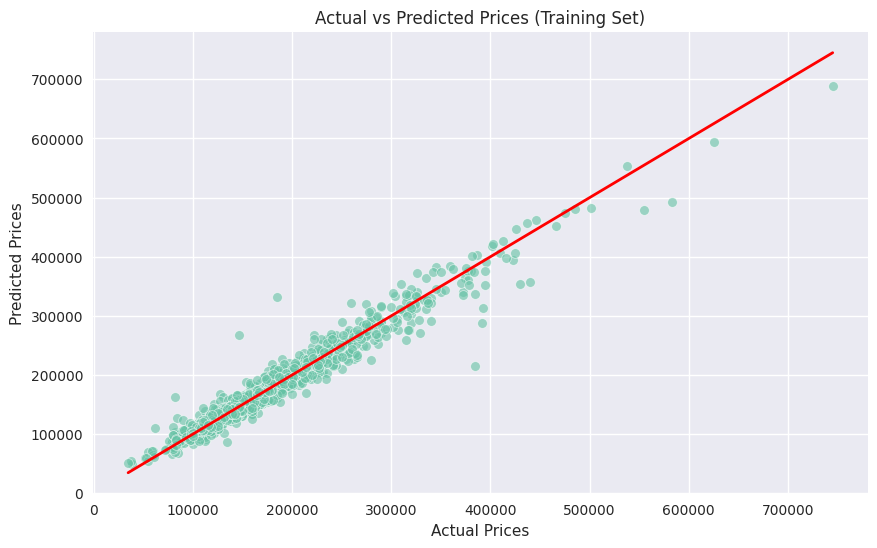

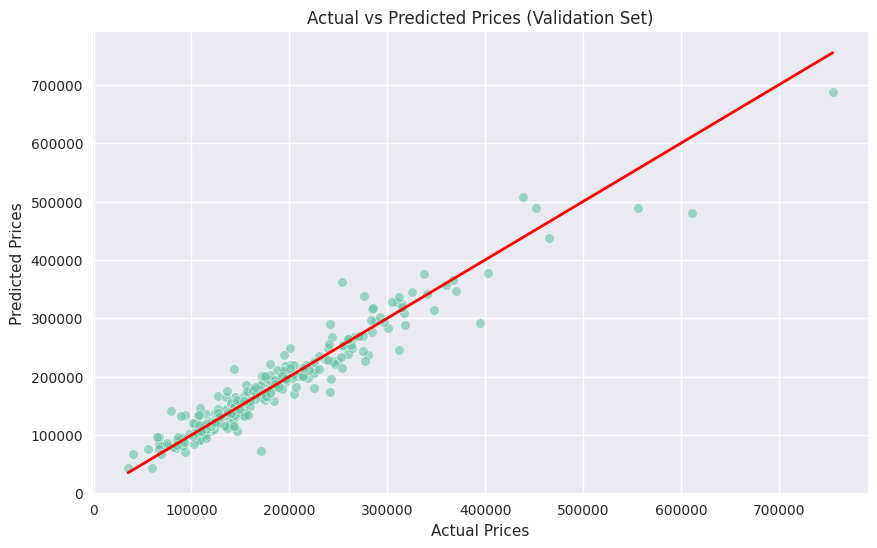

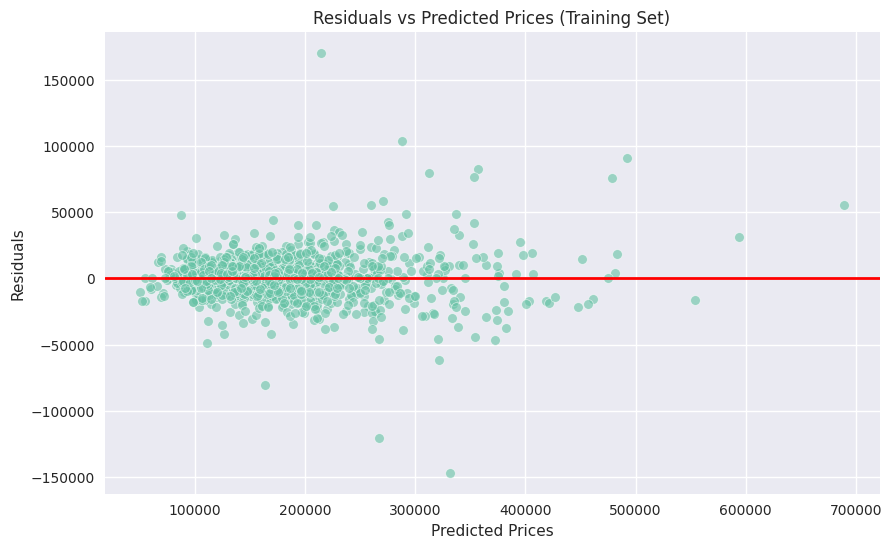

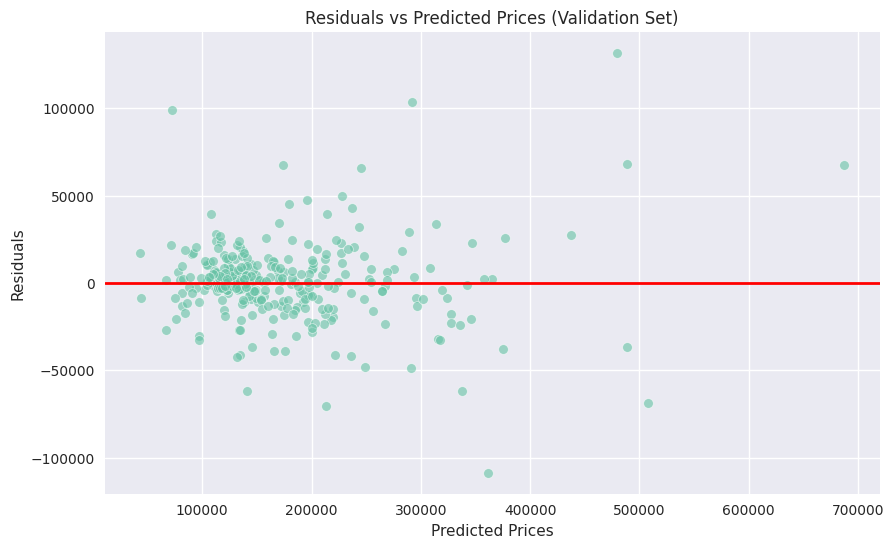

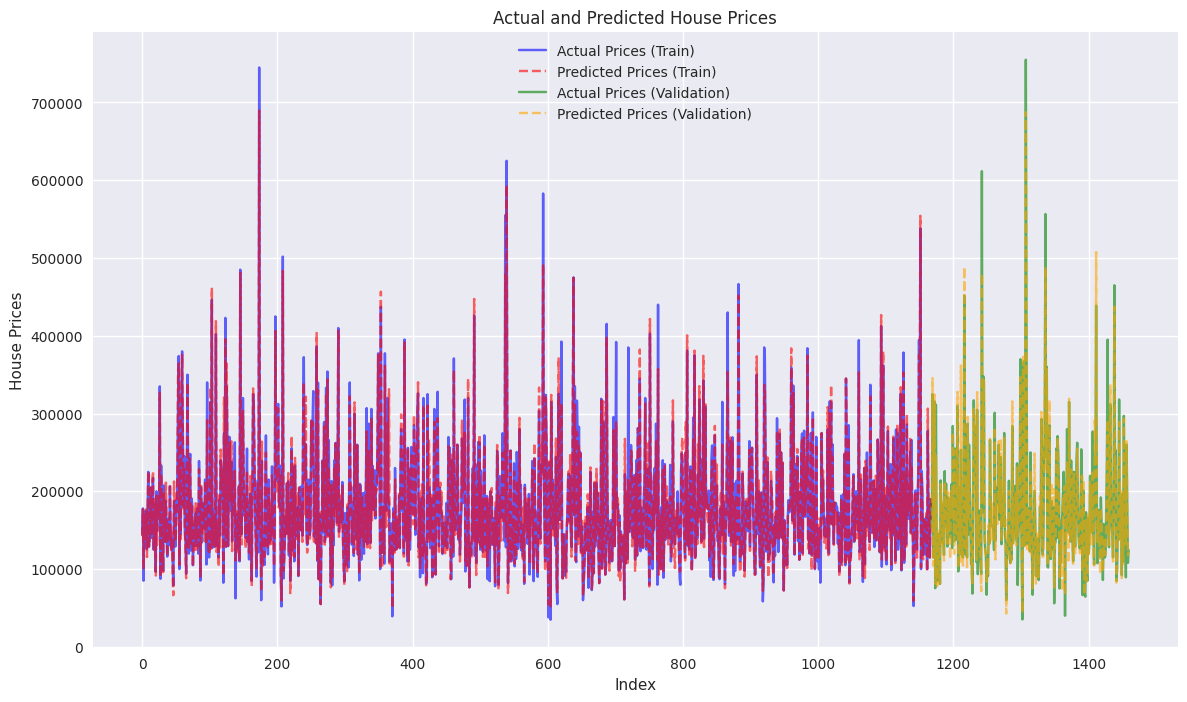

In [63]:
 # Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_actual, y_predicted, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_actual, y=y_predicted, alpha=0.6)
    plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', lw=2)  # Perfect prediction line
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot actual vs predicted prices for training set
plot_actual_vs_predicted(y_train, train_pred_ridge, 'Actual vs Predicted Prices (Training Set)')

# Plot actual vs predicted prices for validation set
plot_actual_vs_predicted(y_valid, valid_pred_ridge, 'Actual vs Predicted Prices (Validation Set)')

# Function to plot residuals
def plot_residuals(y_actual, y_predicted, title):
    residuals = y_actual - y_predicted
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_predicted, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', lw=2)
    plt.xlabel('Predicted Prices')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot residuals for training set
plot_residuals(y_train, train_pred_ridge, 'Residuals vs Predicted Prices (Training Set)')

# Plot residuals for validation set
plot_residuals(y_valid, valid_pred_ridge, 'Residuals vs Predicted Prices (Validation Set)')

# Function to plot actual and predicted prices over indices
def plot_actual_and_predicted_over_indices(y_train, train_pred, y_valid, valid_pred):
    plt.figure(figsize=(14, 8))
    plt.plot(np.arange(len(y_train)), y_train, label='Actual Prices (Train)', color='blue', alpha=0.6)
    plt.plot(np.arange(len(y_train)), train_pred, label='Predicted Prices (Train)', color='red', linestyle='--', alpha=0.6)
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_valid)), y_valid, label='Actual Prices (Validation)', color='green', alpha=0.6)
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_valid)), valid_pred, label='Predicted Prices (Validation)', color='orange', linestyle='--', alpha=0.6)
    plt.xlabel('Index')
    plt.ylabel('House Prices')
    plt.title('Actual and Predicted House Prices')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot actual and predicted prices over indices
plot_actual_and_predicted_over_indices(y_train, train_pred_ridge, y_valid, valid_pred_ridge)

#### Model performance:
* The model appears to be performing reasonably well on both the training and validation sets. Most residuals cluster around the zero line, indicating that predictions are often close to actual values.
#### Linearity:
* There's no clear pattern in the residuals, suggesting the linear assumption is generally met. However, there's slight fanning out at higher predicted prices, which may indicate some non-linearity.
#### Homoscedasticity:
* The spread of residuals increases somewhat for higher predicted prices, especially in the validation set. This suggests potential heteroscedasticity, where prediction errors are larger for higher-priced items.
#### Outliers:
* Both plots show some significant outliers, particularly in the negative direction. The training set has one notable outlier around -300,000, while the validation set has a few large positive outliers above 150,000.
#### Prediction range:
* The model predicts prices roughly between 100,000 and 600,000 for the training set, and up to about 700,000 for the validation set.
#### Generalization:
* The validation set plot shows similar patterns to the training set, suggesting decent generalization. However, the validation set has more pronounced outliers and heteroscedasticity.

#### Final Stacking Model

In [64]:
# Log-transform the target variable
y_train_log = np.log(y_train)
y_valid_log = np.log(y_valid)

def rmse_log(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log(y_true), np.log(y_pred)))

# Define base models
base_models = [
    ('gb_model', gb_model),
    ('rforest', rf_random),
    ('xgb_rfe_optuna', xgb_rfe_optuna),
    ('gb_rfe', gb_rfe),
    ('lgbm', lgbm)
]

# Use the best Ridge regression model found earlier as the final estimator
best_ridge_alpha = random_search.best_params_['ridge__alpha']

# Define final estimator (meta-regressor) with StandardScaler
final_estimator = Pipeline([
    ('scaler', StandardScaler()),  # Standard scaler
    ('ridge', Ridge(alpha=best_ridge_alpha))  # Ridge Regression with the best alpha
])

# Create Stacking Regressor with StandardScaler in the final estimator
stacked_model = StackingRegressor(estimators=base_models, final_estimator=final_estimator)

# Train the Stacking Regressor
stacked_model.fit(X_train, y_train_log)

# Predictions on training and validation sets
train_pred_stacked = np.exp(stacked_model.predict(X_train))
valid_pred_stacked = np.exp(stacked_model.predict(X_valid))

# Calculate RMSE and R-squared on the original scale
train_rmse_stacked = rmse_log(y_train, train_pred_stacked)
valid_rmse_stacked = rmse_log(y_valid, valid_pred_stacked)
train_r2_stacked = r2_score(y_train, train_pred_stacked)
valid_r2_stacked = r2_score(y_valid, valid_pred_stacked)

print("Stacked Model Results:")
print(f"Train RMSE: {train_rmse_stacked}")
print(f"Valid RMSE: {valid_rmse_stacked}")
print(f"Train R2: {train_r2_stacked}")
print(f"Valid R2: {valid_r2_stacked}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4166
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 183
[LightGBM] [Info] Start training from score 12.030652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

* The Stacked Model demonstrates strong performance across both training and validation sets, with low RMSE and high R-squared values indicating effective integration of diverse model predictions to improve overall accuracy and generalization capability

In [65]:
## Align columns of X_test with X_train
X_test_aligned, _ = X_test.align(X_train, axis=1, join='right', fill_value=0)

# Ensure the same column order
X_test_aligned = X_test_aligned[X_train.columns]

# Make predictions using the stacked model
test_pred_log = stacked_model.predict(X_test_aligned)

# Convert predictions back to the original scale
test_pred = np.exp(test_pred_log)

# Prepare the submission DataFrame
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': test_pred})

# Display the top 20 rows of the predictions
print(submission.head(20))

submission.to_csv('submission.csv', index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
      Id      SalePrice
0   1461  123555.684824
1   1462  157920.460154
2   1463  189342.016675
3   1464  190361.294359
4   1465  199399.681631
5   1466  180384.667210
6   1467  185555.196569
7   1468  171642.622675
8   1469  180803.686561
9   1470  120690.989157
10  1471  197406.024333
11  1472   92563.248604
12  1473  100499.576623
13  1474  146477.012721
14  1475  126603.620855
15  1476  383231.551791
16  1477  263109.591819
17  1478  289734.331607
18  1479  266873.408763
19  1480  480967.423247


## Recommendations for the business:

* Feature Emphasis in Listings: Encourage real estate agents to highlight key features like total rooms above ground, living area (GrLivArea), and bedroom count in property listings. These features consistently show high importance across models and are critical factors influencing home prices.

* Neighborhood Insights: Incorporate neighborhood quality data or metrics into property evaluations. Neighborhood features, such as overall quality (Neighborhood_OverallQual), significantly impact home values. Providing insights into neighborhood attributes can enhance buyer confidence and valuation accuracy.

* Quality and Condition: Emphasize the importance of property quality and condition (e.g., OverallQual, OverallCond) in pricing strategies. Ensuring properties are well-maintained and accurately represented in terms of condition can positively influence perceived value and sales outcomes.

* Continuous Model Evaluation: Implement a framework for regular model evaluation and updates. Real estate markets evolve, and so do the factors influencing property values. Regularly updating models with new data and evaluating model performance ensures relevance and accuracy in predictions over time.

* Investment in Technology and Training: Invest in technology tools and training for real estate agents to effectively utilize predictive analytics and machine learning insights. Empowering agents with these tools can enhance their ability to provide data-driven advice and optimize property marketing strategies.

* Customer Education: Educate buyers and sellers on the factors influencing property values. Providing transparent information on how features like living space, neighborhood quality, and overall property condition affect pricing can build trust and facilitate smoother transactions.

By implementing these recommendations, the business can enhance its competitive edge in the real estate market, improve decision-making processes, and better meet the needs of both buyers and sellers.